In [1]:
from F1_library import libraryF1dataNotebook as libraryDataF1
import pandas as pd
import numpy as np
import fastf1 as ff1

from fastf1 import utils
from matplotlib import pyplot as plt

# FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX 2025
The Las Vegas Grand Prix is a motor racing event that forms part of the Formula One World Championship, taking place in Paradise, Nevada, in the United States. It is conducted as a night race on a temporary street circuit that includes parts of the Las Vegas Strip. The first race was held on November 18, 2023. Formula One and Las Vegas have signed an agreement until 2025 for the race
Source: Wikipedia

## Obtain session information

In [2]:
libraryDataF1.obtain_information('sessions',year=2025,country_acronym='USA').query("circuit_short_name== 'Las Vegas'")

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
10,1274,9851,Las Vegas,2025-11-21T00:30:00+00:00,2025-11-21T01:30:00+00:00,Practice,Practice 1,19,USA,United States,152,Las Vegas,-08:00:00,2025
11,1274,9852,Las Vegas,2025-11-21T04:00:00+00:00,2025-11-21T05:00:00+00:00,Practice,Practice 2,19,USA,United States,152,Las Vegas,-08:00:00,2025
12,1274,9853,Las Vegas,2025-11-22T00:30:00+00:00,2025-11-22T01:30:00+00:00,Practice,Practice 3,19,USA,United States,152,Las Vegas,-08:00:00,2025
13,1274,9854,Las Vegas,2025-11-22T04:00:00+00:00,2025-11-22T05:00:00+00:00,Qualifying,Qualifying,19,USA,United States,152,Las Vegas,-08:00:00,2025


req         WARNING 	DEFAULT CACHE ENABLED! (5.35 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 1 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status

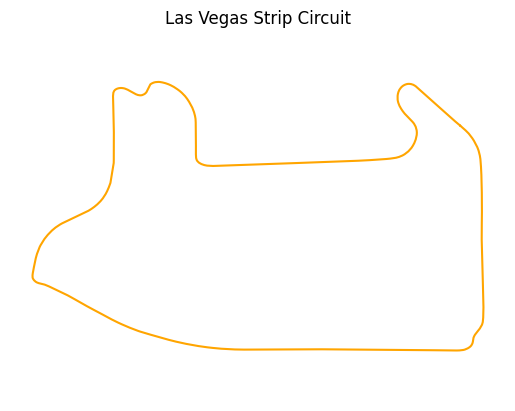

In [3]:
session = ff1.get_session(2025,22, 'FP1')
session.load()

lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()
libraryDataF1.draw_track(circuit_info,pos,"Las Vegas Strip Circuit")

## Free Practice 1
### Obtain setup

In [4]:
practice = libraryDataF1.obtain_information('laps',session_key=9851)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9851)
drivers = libraryDataF1.obtain_information('drivers',session_key=9851)

In [5]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Red Bull and Racing Bulls gambled for less downforce than their rivals. On the other hand, Alpine and McLaren bet for the second sector.

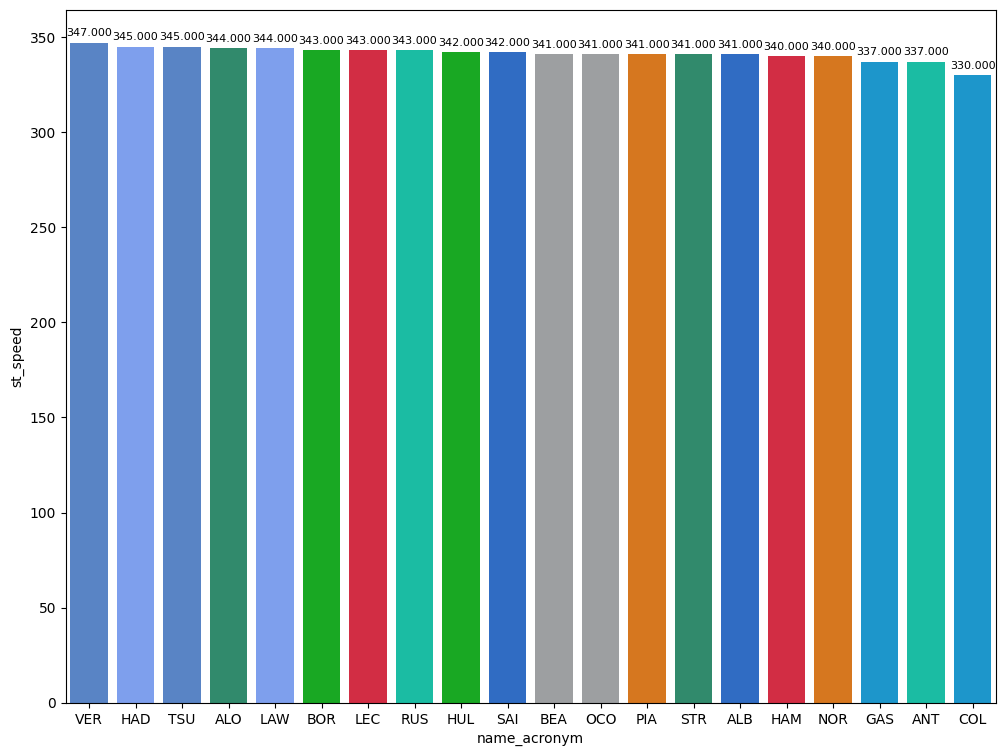

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

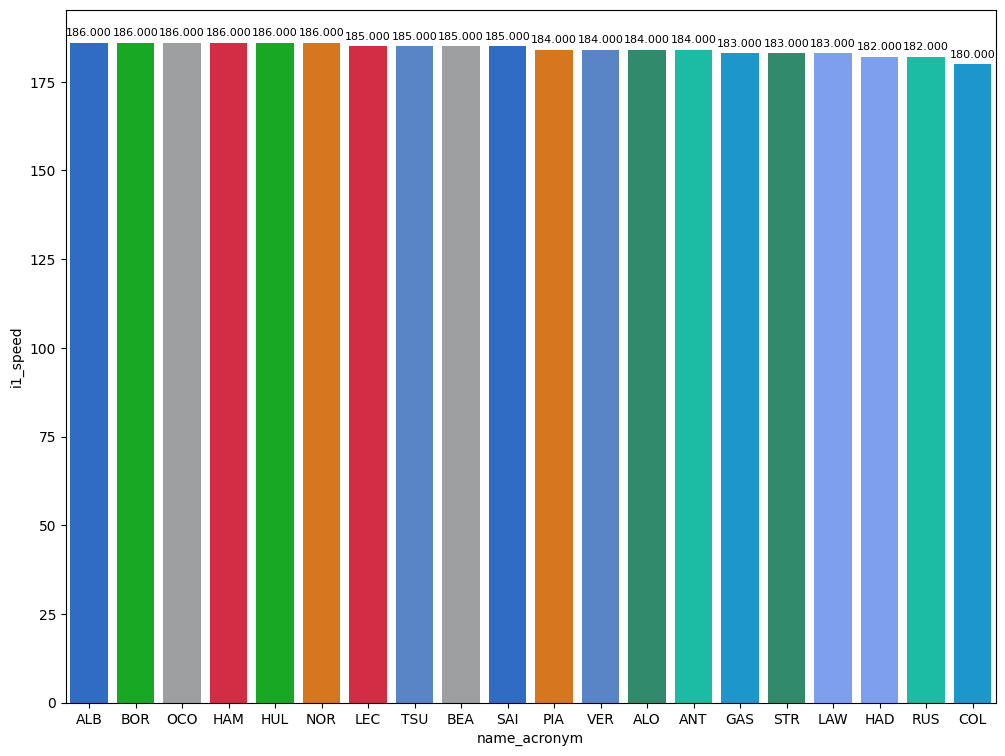

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

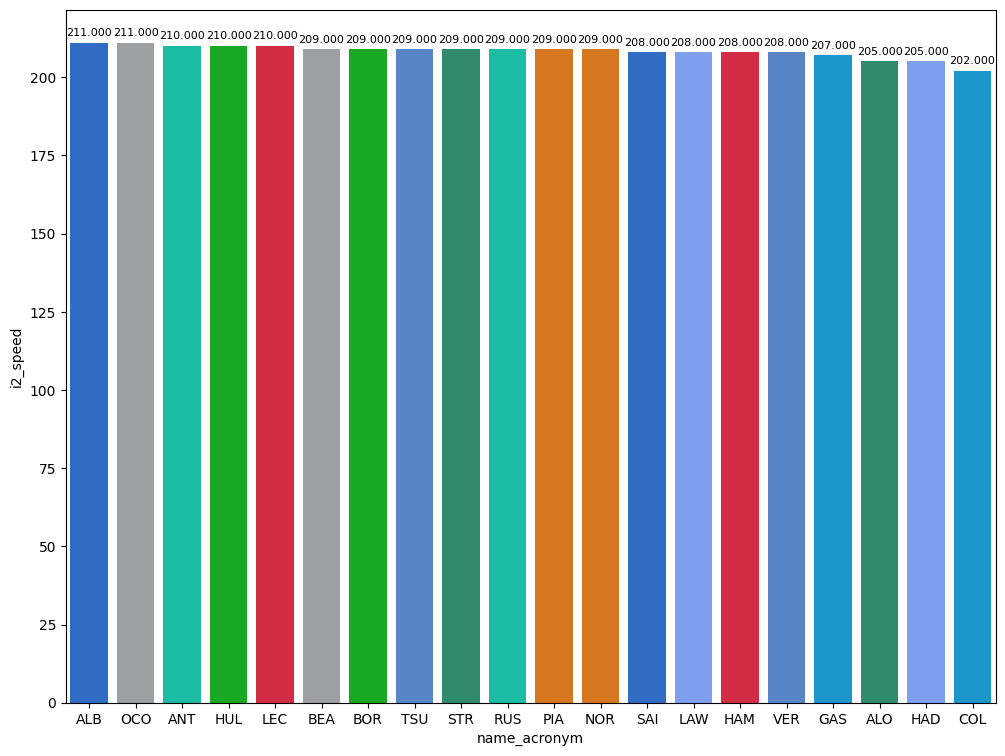

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [9]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
119,Nico HULKENBERG,HARD,27.743,32.700,36.927,97.370
204,Max VERSTAPPEN,MEDIUM,27.149,32.161,36.466,95.776
361,Charles LECLERC,SOFT,26.791,31.724,36.287,94.802


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.
Red Bull had a good performance and Williams adapted very well. Ferrari seems very competitive and Mercedes hid.


In [10]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


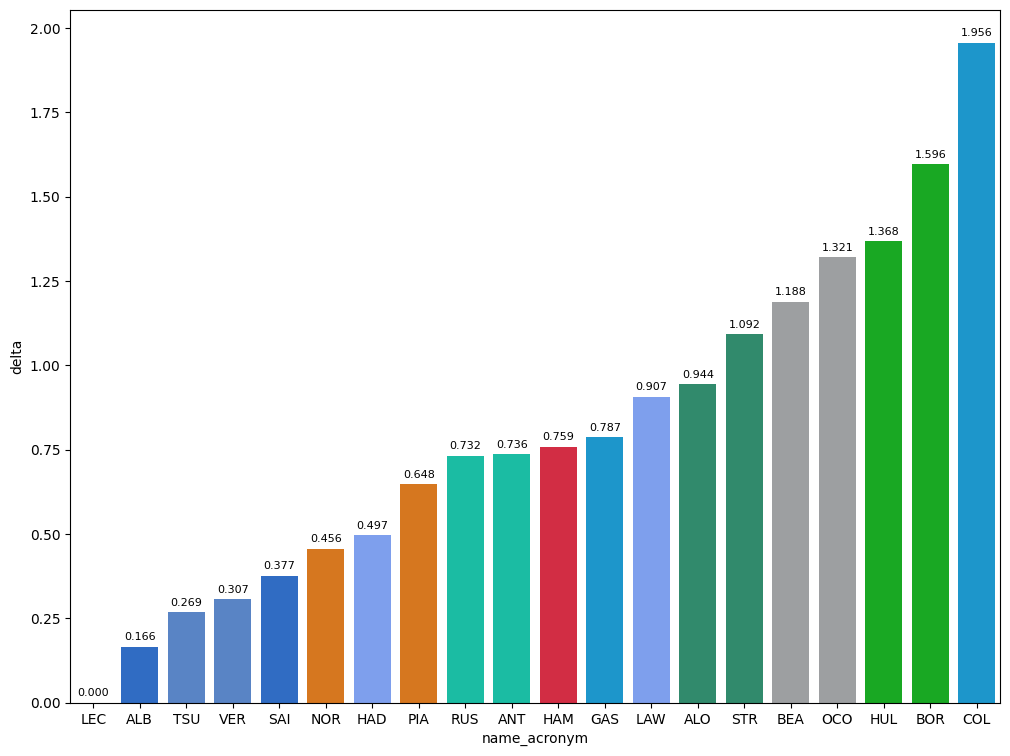

In [11]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

S1:Ferrari, Red Bull and Williams are very competitive while Sauber and Haas suffer here. Aston's pace is not bad.
S2: Williams' setup is competitive being fast in the second sector. Ferrari loses its advantage in this sector and Mercedes emerges
S3: MER is more competitive than S1 and Red Bull and Ferrari are fast.

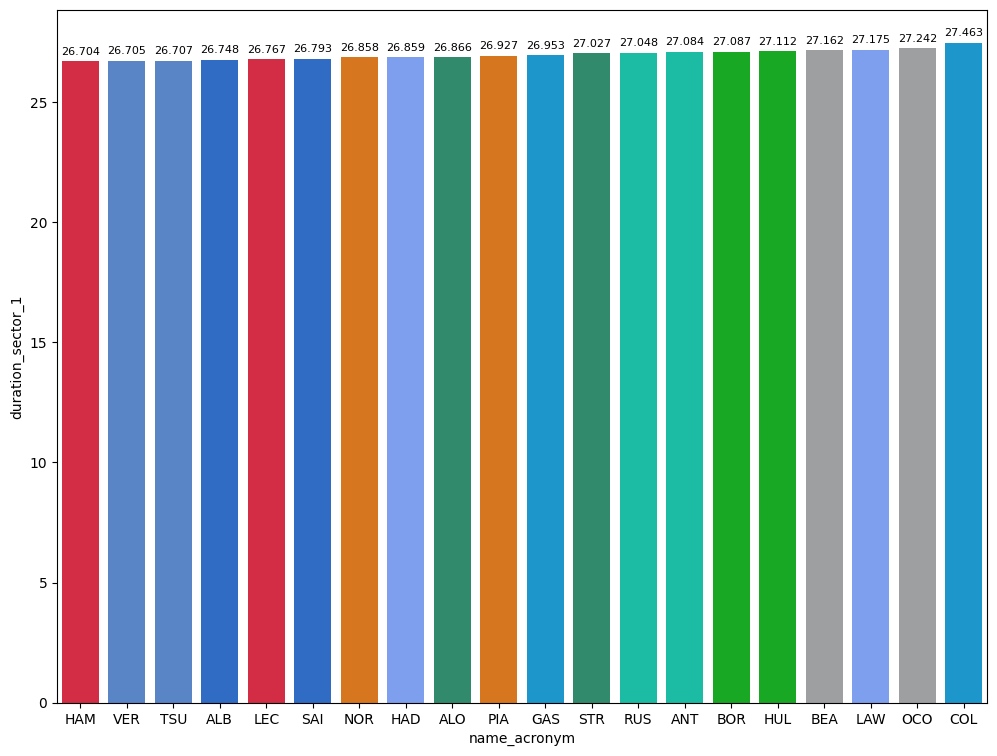

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

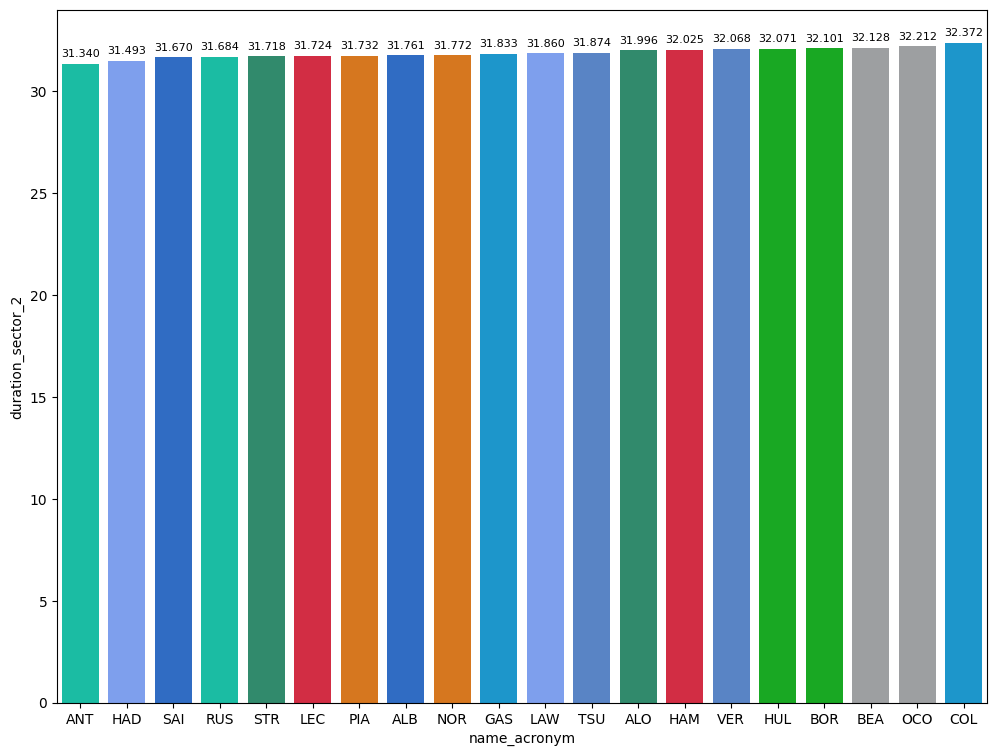

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

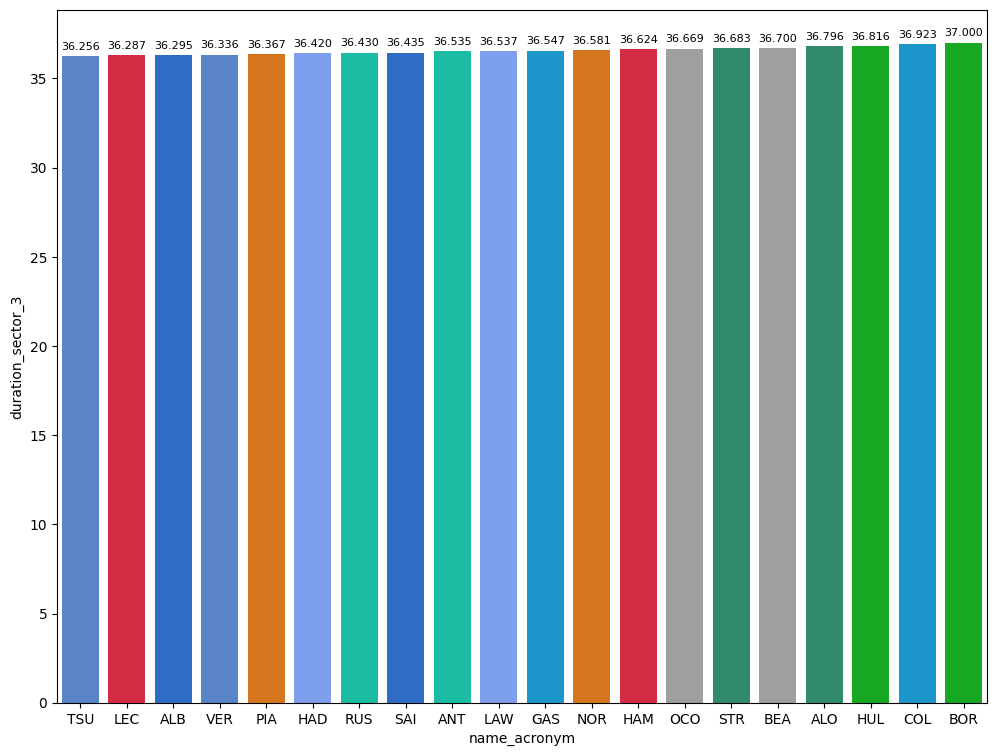

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [15]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration > 97 and lap_duration <=101").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
HARD,98.539875
MEDIUM,98.673517
SOFT,99.001800


## Free Practice 2
### Obtain setup

In [16]:
practice = libraryDataF1.obtain_information('laps',session_key=9852)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9852)
drivers = libraryDataF1.obtain_information('drivers',session_key=9852)

In [17]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

### Speed trap
Alpine gambled for pace on the straight and Mercedes gambled for S2.

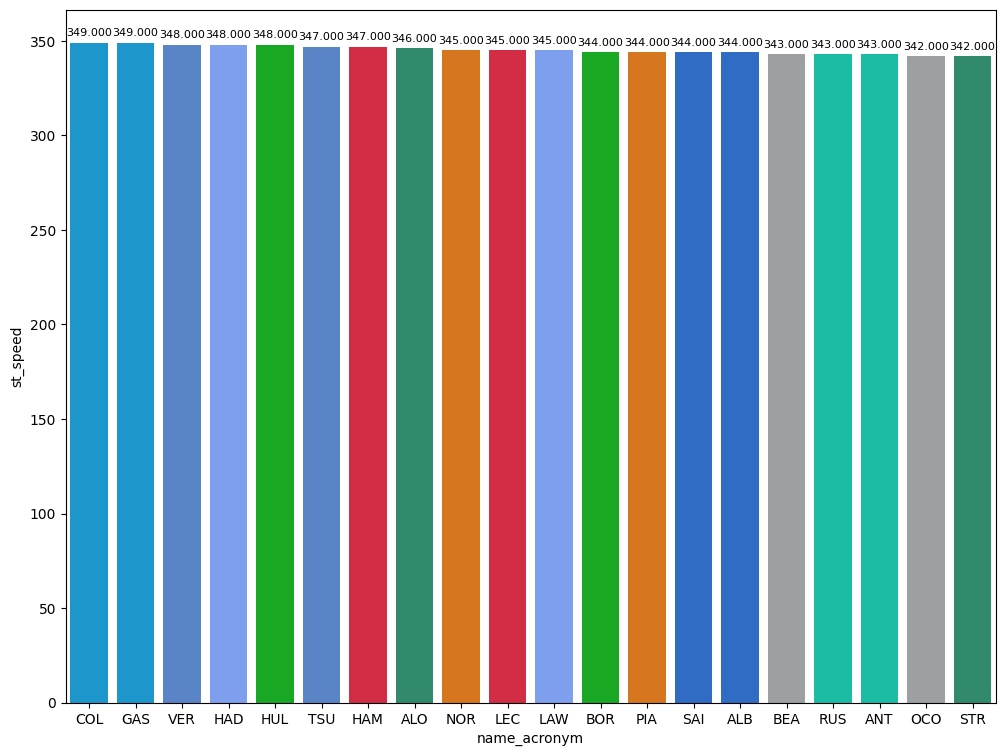

In [18]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

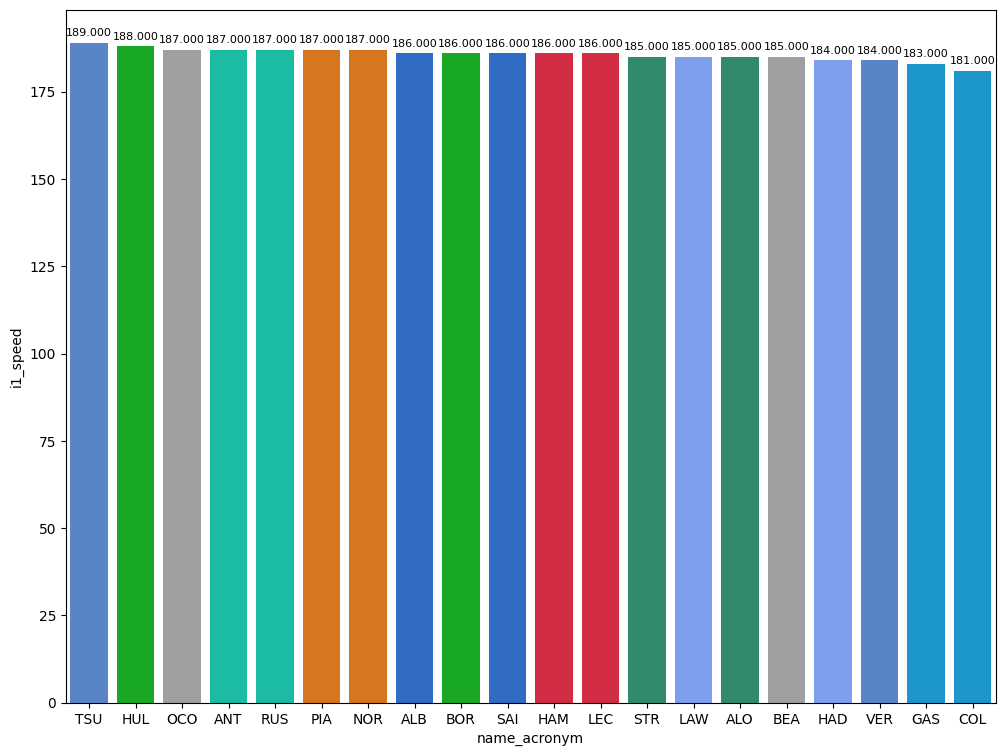

In [19]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

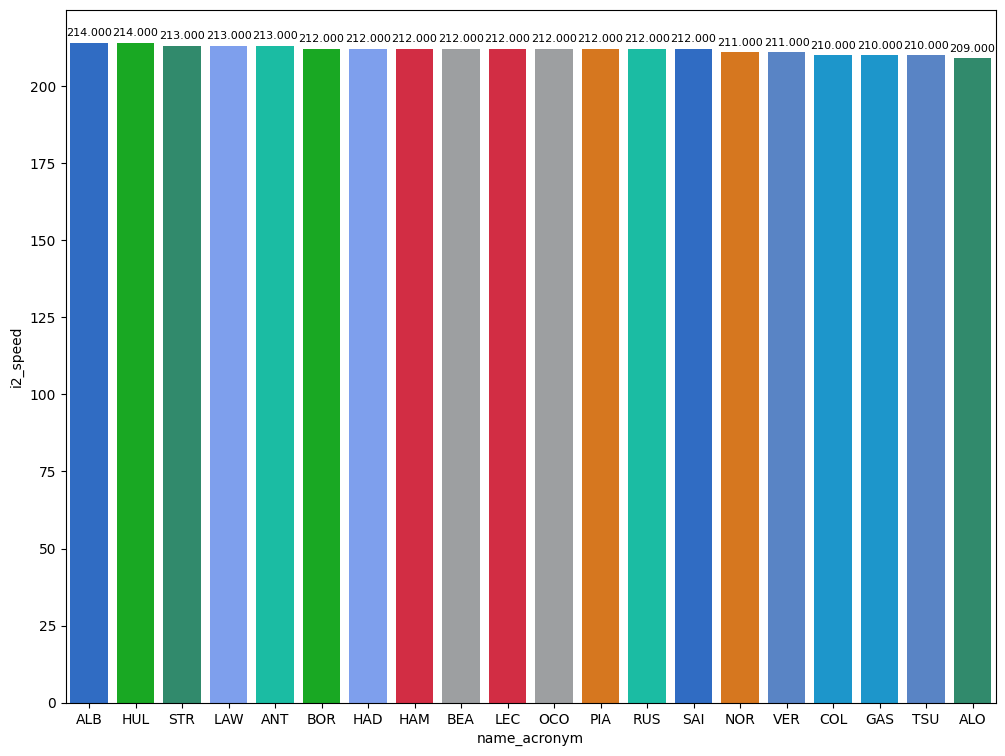

In [20]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [21]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
180,Gabriel BORTOLETO,HARD,26.949,31.921,36.629,95.499
179,Charles LECLERC,MEDIUM,26.557,31.295,35.911,93.763
251,Lando NORRIS,SOFT,26.332,31.225,36.045,93.602


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session.Due to changing conditions, only a part of the free practice were important and this part will be taken into consideration.
Not all the drivers made their fastest attemp. It's tricky to analyze without their fastest attemp but it seems that Haas could suffer and Williams could have a shot to enter in Q3 and Mercedes showed its potential

In [22]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


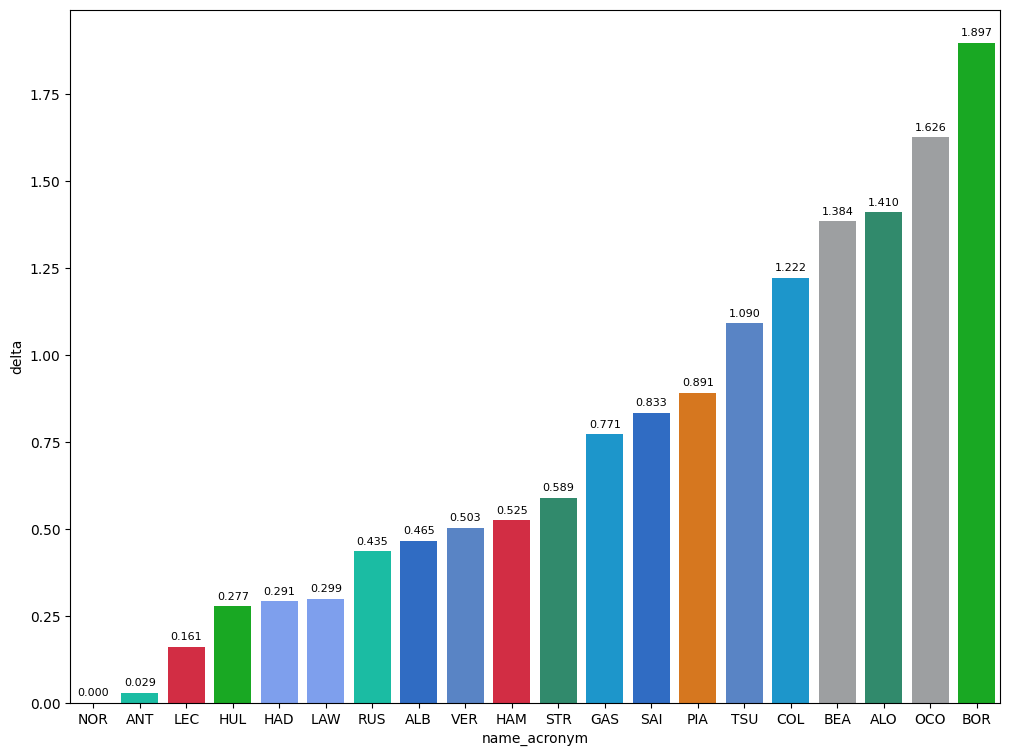

In [23]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.
S1: Mercedes and Red Bull are quick but McLaren did not show its potential. Haas, Sauber and ALpine(not best attemp) suffer here.
S2: Red Bull suffers in this sector.
S3: Ferrari shines and McLaren is strong.

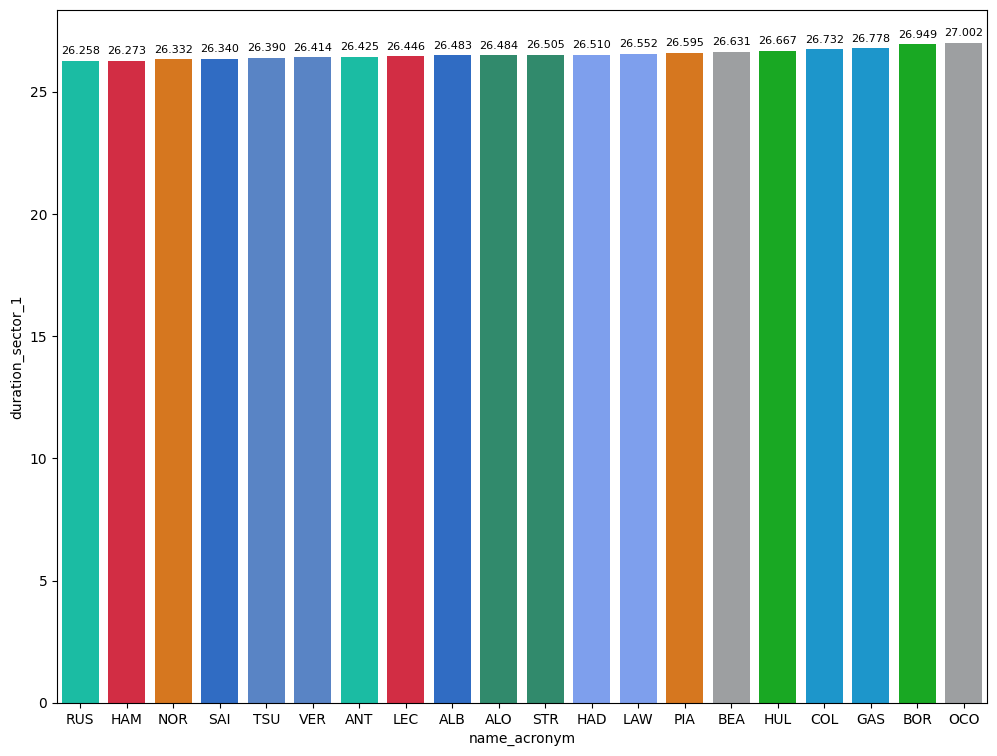

In [24]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

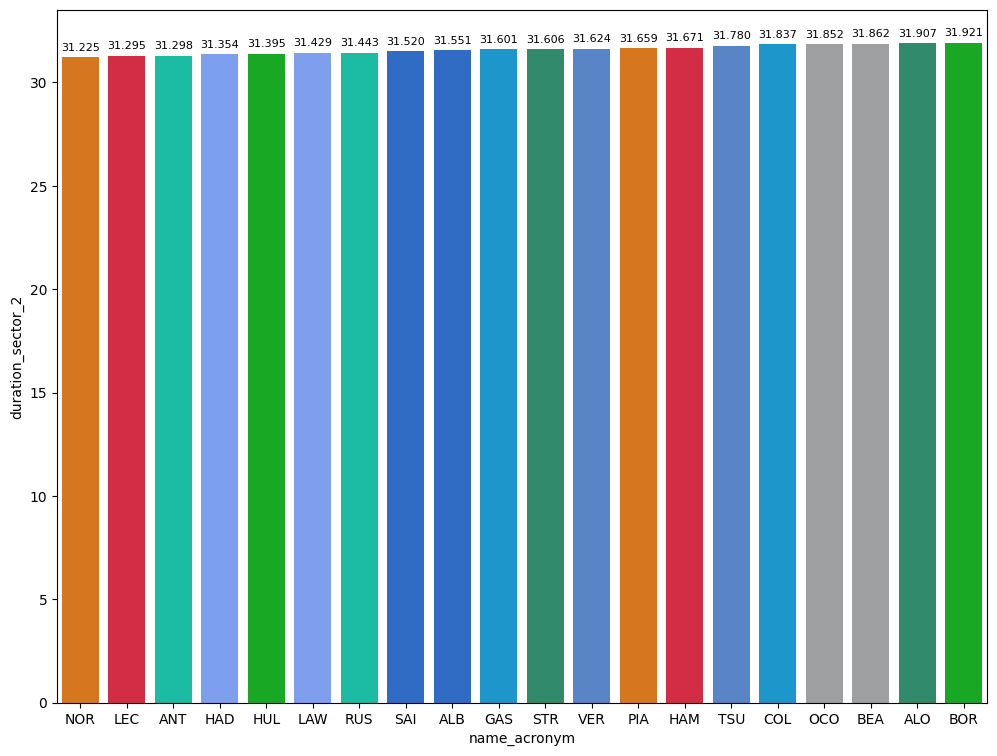

In [25]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

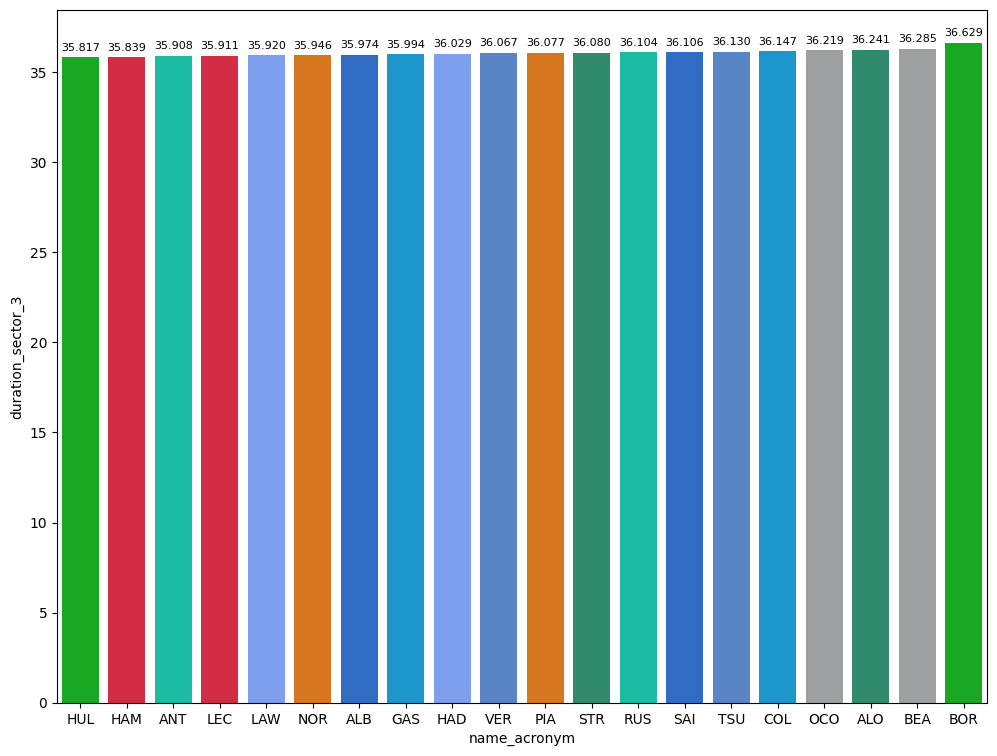

In [26]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [27]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False  and lap_duration>98 and lap_duration <=103").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
MEDIUM,99.992812
HARD,99.993000
SOFT,100.475000


### Long runs
No data available

## Free Practice 3
### Obtain setup

In [3]:
practice = libraryDataF1.obtain_information('laps',session_key=9853)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9853)
drivers = libraryDataF1.obtain_information('drivers',session_key=9853)


In [ ]:
# drivers.loc[drivers['driver_number']==30,'team_name'] = 'RB'
# drivers.loc[drivers['driver_number']==43,'team_name'] = 'Williams'

In [4]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointables2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])
libraryDataF1.obtain_drivers_colours(drivers)

In [5]:
session = ff1.get_session(2025, 22, 'FP3')
session.load();

req         WARNING 	DEFAULT CACHE ENABLED! (5.4 GB) /home/frank/.cache/fastf1
core           INFO 	Loading data for Las Vegas Grand Prix - Practice 3 [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status 

### Speed trap

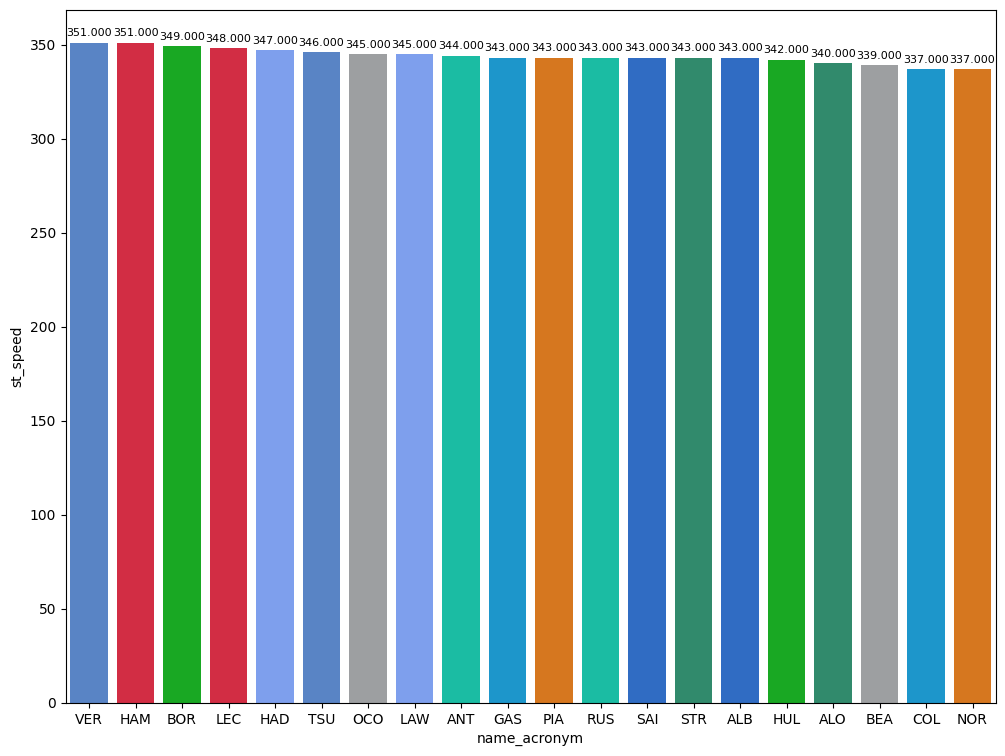

In [6]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

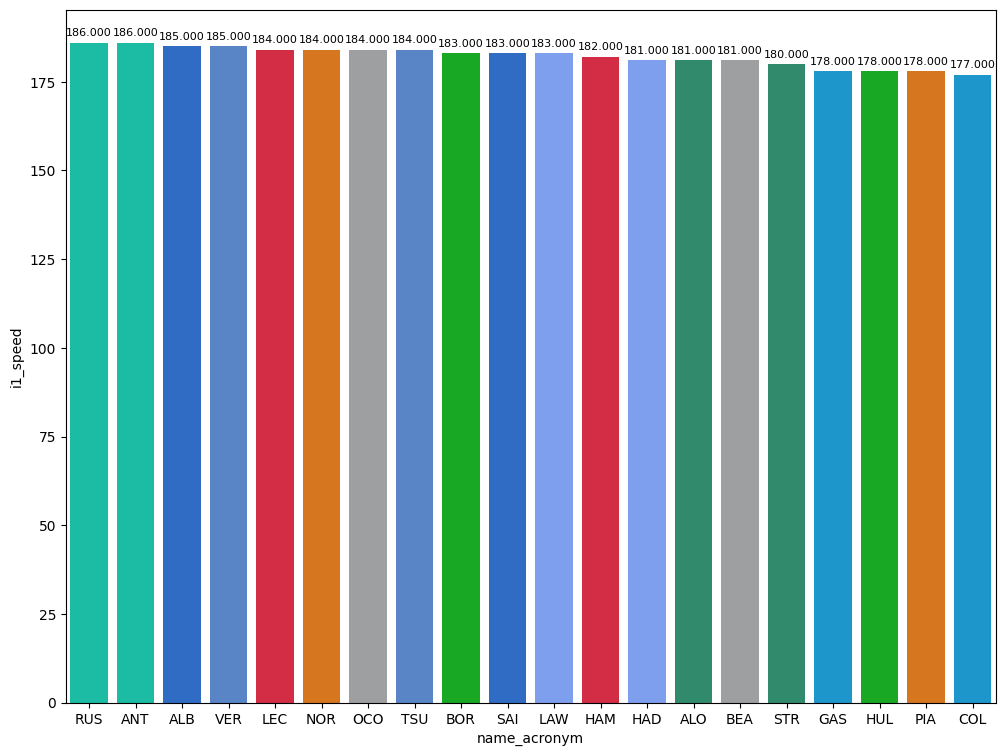

In [7]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

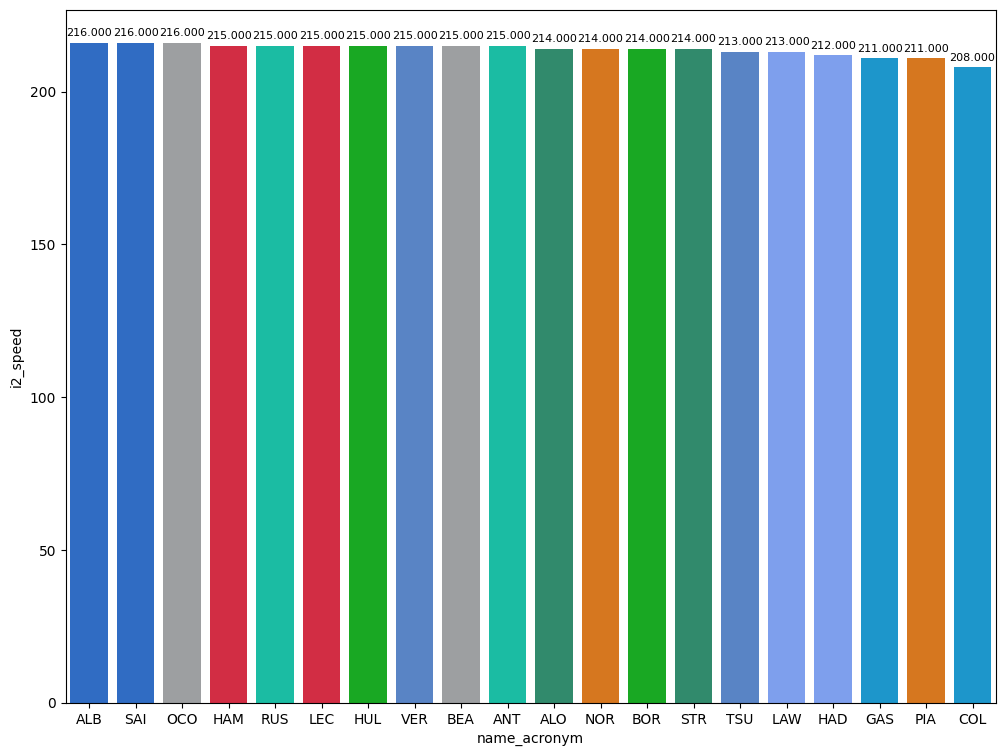

In [8]:
top_speed = jointables2.loc[jointables2.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Fastest lap per compound
In this section, I will show the best lap with the different compounds of the session. 

In [9]:
compoundsPace = jointables2.loc[jointables2.groupby(['compound'])['lap_duration'].idxmin().dropna()]
compoundsPace[['full_name','compound','duration_sector_1','duration_sector_2','duration_sector_3','lap_duration']]

,full_name,compound,duration_sector_1,duration_sector_2,duration_sector_3,lap_duration
85,Lewis HAMILTON,INTERMEDIATE,29.862,35.456,37.491,102.809
355,George RUSSELL,SOFT,26.816,31.579,35.659,94.054


### Deltas
In this section we can see the deltas of the fastest lap of each driver compared with the fastest lap of the session

In [10]:
practiceCleaned = jointables2.query("lap_duration >1")
drivers_list = list(practiceCleaned['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_fastest_lap(driver,practiceCleaned,newdataset)

arr= libraryDataF1.obtain_deltas(newdataset)
newdataset.insert(3,'delta',arr)


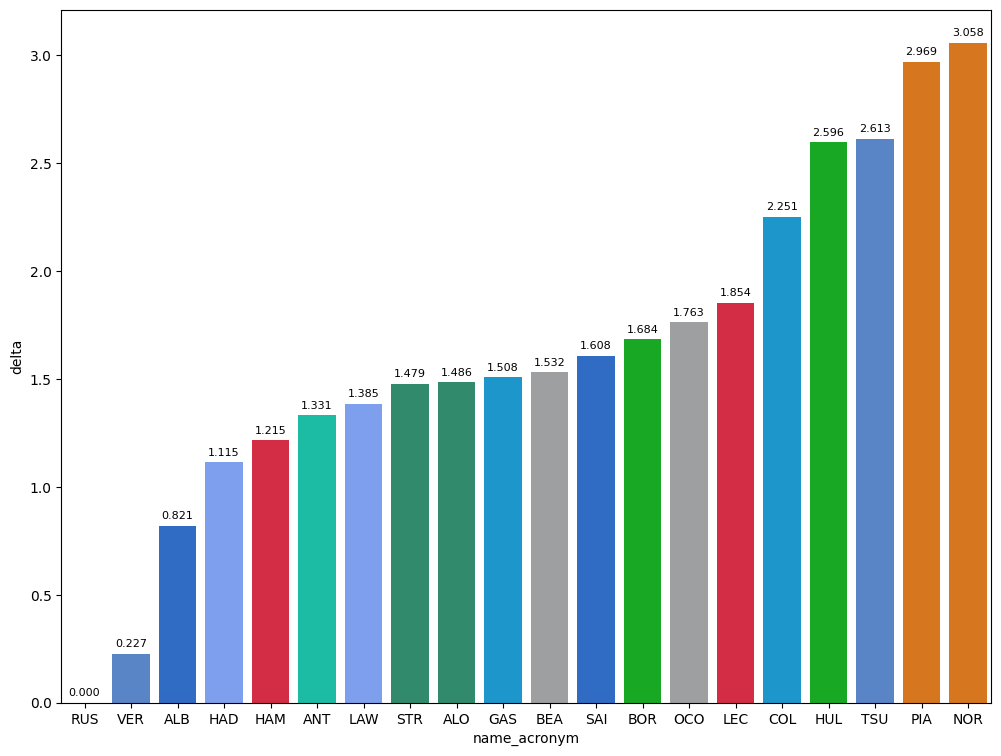

In [11]:
dt = newdataset.sort_values(ascending=True,by='delta')
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Track dominance
In this section, best sector are taken of each sector to see the car's performance in each sector.

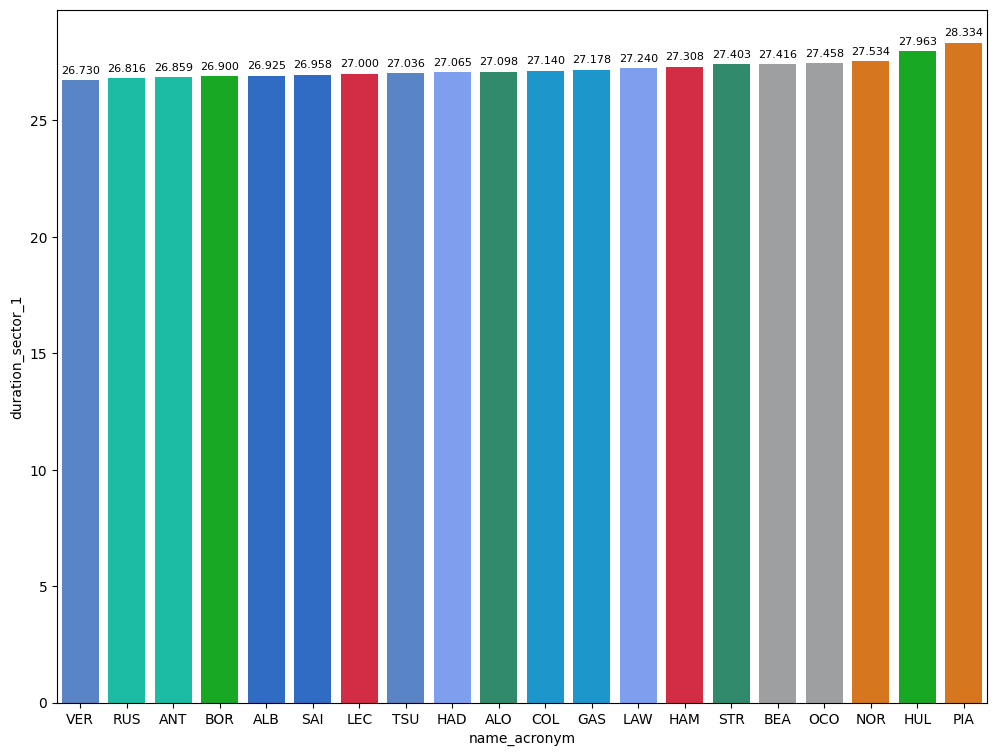

In [12]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_1'].idxmin().dropna()].sort_values(by=['duration_sector_1'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_1",sectorPace)

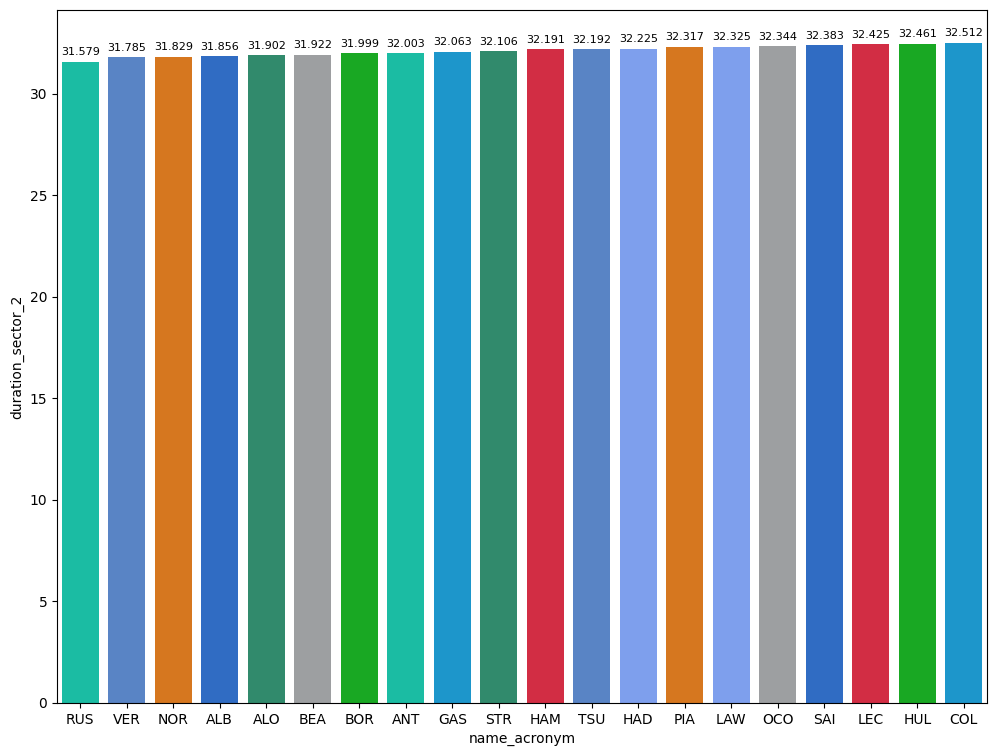

In [13]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_2'].idxmin().dropna()].sort_values(by=['duration_sector_2'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_2",sectorPace)

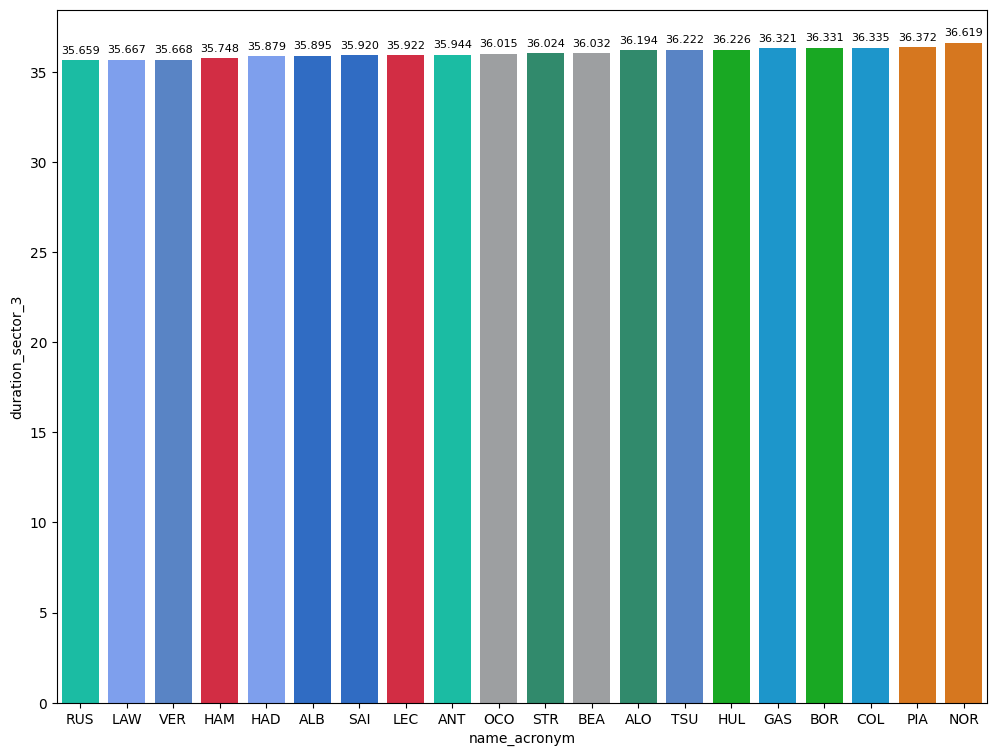

In [14]:
sectorPace = jointables2.loc[jointables2.groupby(['driver_number'])['duration_sector_3'].idxmin().dropna()].sort_values(by=['duration_sector_3'],ascending=True)
libraryDataF1.obtainchart("name_acronym","duration_sector_3",sectorPace)

### Mean pace with the different compound used on the session

In [15]:
race_pace = pd.DataFrame(jointables2.query("is_pit_out_lap == False and lap_duration <102 and lap_duration > 93").groupby("compound")['lap_duration'].mean().sort_values(ascending=True))
race_pace

,lap_duration
compound,
SOFT,97.769467


## Predictions

In [ ]:
# Free Practice 1
practice = libraryDataF1.obtain_information('laps',session_key=9637)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9637)
drivers = libraryDataF1.obtain_information('drivers',session_key=9637)

stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice1 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])

#Free Practice 2
practice = libraryDataF1.obtain_information('laps',session_key=9638)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9638)
drivers = libraryDataF1.obtain_information('drivers',session_key=9638)
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)
jointablesfreepractice2 = pd.merge(practice,stintsDataFrame,on=['lap_number','driver_number'])


### Qualyfing prediction

In [ ]:
qualy_simulation = libraryDataF1.qualyfing_prediction([jointablesfreepractice1,jointablesfreepractice2],drivers,0.02,0.02,0.01)
qualy_simulation.sort_values(by='qualy_lap_time')

### Race prediction

In [ ]:
race_simulation = libraryDataF1.race_prediction(jointablesfreepractice2,drivers,98,103)
race_simulation.groupby('team').mean().sort_values(by='mean_lap_duration')

## Qualyfing
### Set up
First of all, it is neccesary to obtain the data about the qualyfing
#### Race control
This section has been added in order to know which laps has been deleted and knowing what happened on track during this session. As every laptime that has been deleted were slow laps, none of them were removed.

In [16]:
libraryDataF1.obtain_information('race_control',session_key=9854)

,meeting_key,session_key,date,driver_number,lap_number,category,flag,scope,sector,message
0,1274,9854,2025-11-22T03:51:16+00:00,None,None,Flag,YELLOW,Sector,14.0,YELLOW IN TRACK SECTOR 14
1,1274,9854,2025-11-22T03:51:19+00:00,None,None,Flag,CLEAR,Sector,14.0,CLEAR IN TRACK SECTOR 14
2,1274,9854,2025-11-22T03:51:22+00:00,None,None,Flag,YELLOW,Sector,12.0,YELLOW IN TRACK SECTOR 12
3,1274,9854,2025-11-22T03:51:25+00:00,None,None,Flag,CLEAR,Sector,12.0,CLEAR IN TRACK SECTOR 12
4,1274,9854,2025-11-22T03:56:19+00:00,None,None,Other,None,None,NaN,TRACK SURFACE SLIPPERY IN TRACK SECTOR 8
...,...,...,...,...,...,...,...,...,...,...
183,1274,9854,2025-11-22T05:18:19+00:00,None,None,Flag,CHEQUERED,Track,NaN,CHEQUERED FLAG
184,1274,9854,2025-11-22T05:18:48+00:00,None,None,Flag,DOUBLE YELLOW,Sector,17.0,DOUBLE YELLOW IN TRACK SECTOR 17
185,1274,9854,2025-11-22T05:18:48+00:00,None,None,Other,None,None,NaN,TURN 12 INCIDENT INVOLVING CARS 81 (PIA) AND 6...
186,1274,9854,2025-11-22T05:19:28+00:00,None,None,Flag,DOUBLE YELLOW,Sector,16.0,DOUBLE YELLOW IN TRACK SECTOR 16


### Obtain setup

In [17]:
qualyfing = libraryDataF1.obtain_information('laps',session_key=9854)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9854)
drivers = libraryDataF1.obtain_information('drivers',session_key=9854)
libraryDataF1.obtain_drivers_colours(drivers)

In [49]:
session = ff1.get_session(2025, 'Las Vegas', 'Q')
session.load()
session.laps["LapTimeSeconds"] = session.laps["LapTime"].dt.total_seconds()

core           INFO 	Loading data for Las Vegas Grand Prix - Qualifying [v3.3.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
logger      WARNING 	Failed to load result data from Ergast!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INF

In [19]:
bestlap = qualyfing.loc[qualyfing.groupby(['driver_number'])['lap_duration'].idxmin()].sort_values(by=['lap_duration'],ascending=True)
bestlap[0:1]

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
365,1274,9854,4,24,2025-11-22T05:05:34.030000+00:00,30.43,36.842,40.662,154.0,194,False,107.934,"[2049, 2049, 2049, 2049, 2049, 2051]","[2051, 2051, 2051, 2049, 2049, 2049, 2048]","[2049, 2049, 2049, 2048, 2048, 2048, 2048, 204...",256


In this case, the fastest lap is 107.934	seconds and the reference will be 120 seconds due to track conditions and the difference among session are significatives.

In [27]:
competitiveLaps = qualyfing.query("is_pit_out_lap == False and lap_duration <= 120")

In [28]:
drivers_list = list(competitiveLaps['driver_number'].unique())
newdataset = pd.DataFrame()
for driver in drivers_list:
    newdataset =libraryDataF1.obtain_information_qualy(driver,competitiveLaps,newdataset)
jointables = pd.merge(newdataset,drivers,on=['driver_number'])
jointables.sort_values(by=['fastest_lap'],ascending=True)
print()

#### Best lap per driver compared with the best lap of the session
In this chart we can see the deltas with compared with the fastest lap of the session that it could be different than the pole.

Tricky session where we watched a big track improvement among sessions. Track in Q1 was soaked and we watched some surprises and ANT, TSU and HAM out. In Q2,drivers improved in each attemp and in Q3 we had some surprises as Lawson finished P6.

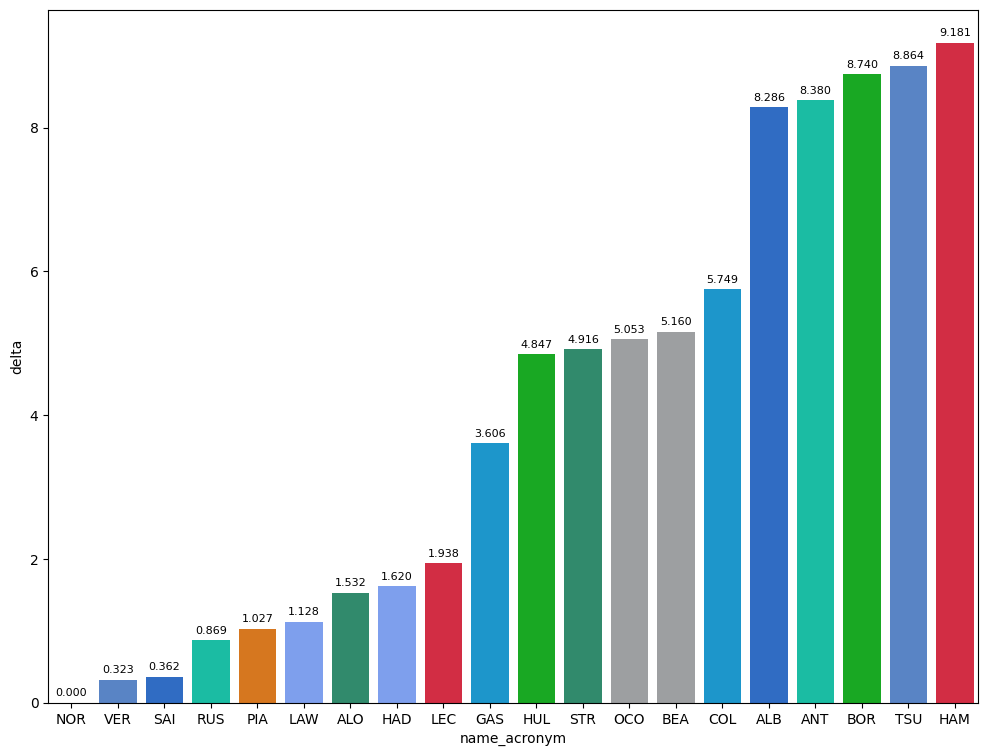

In [29]:
dt = jointables.sort_values(by=['fastest_lap'],ascending=True)
libraryDataF1.obtainchart("name_acronym","delta",dt)

### Speed trap

#### Maximum speed per drivers

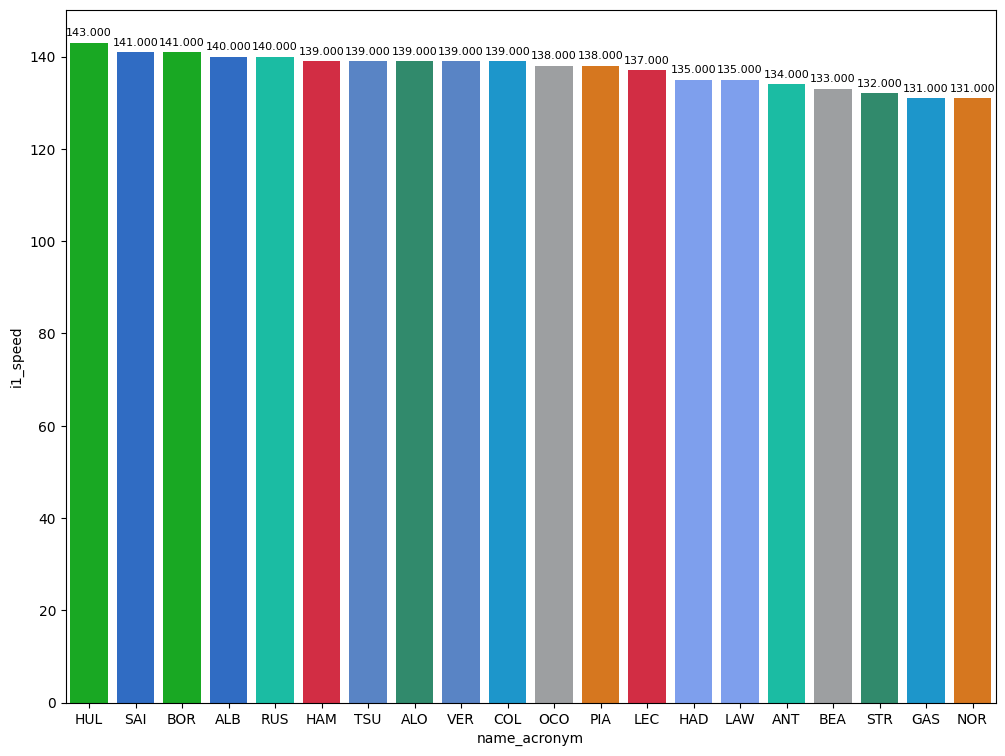

In [30]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

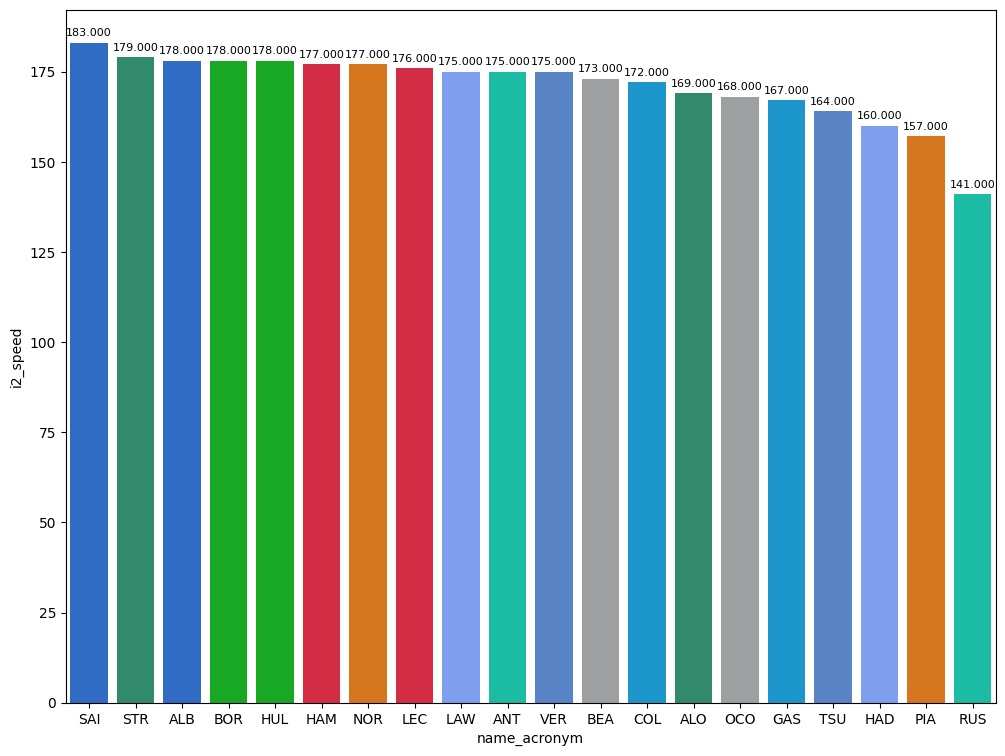

In [31]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

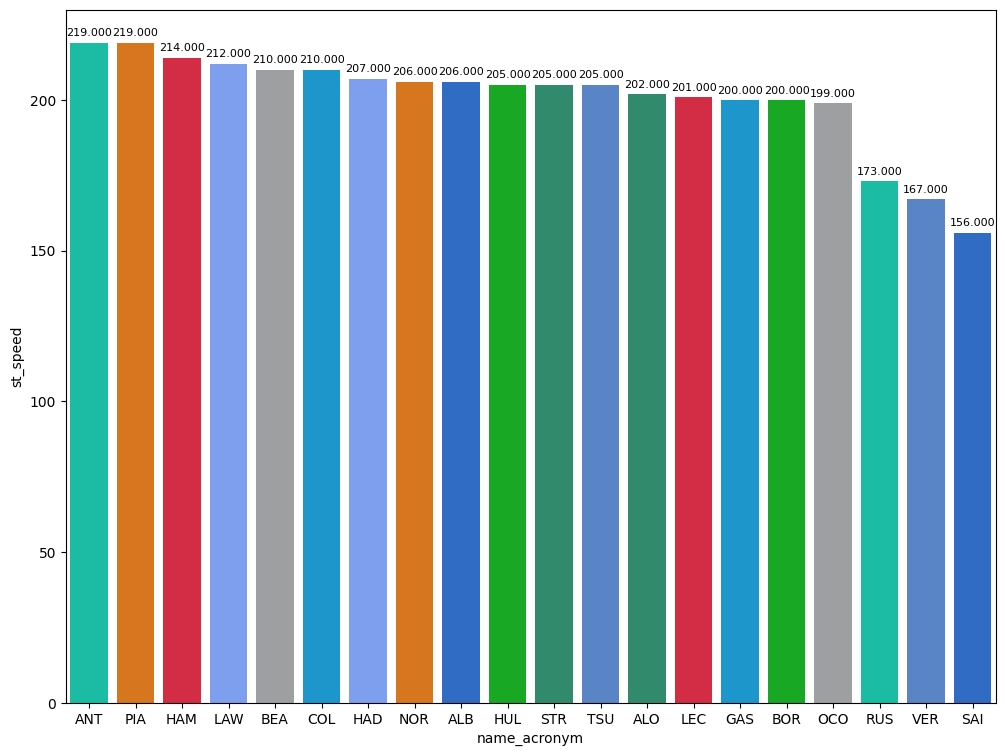

In [32]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

### Maximum speed per teams

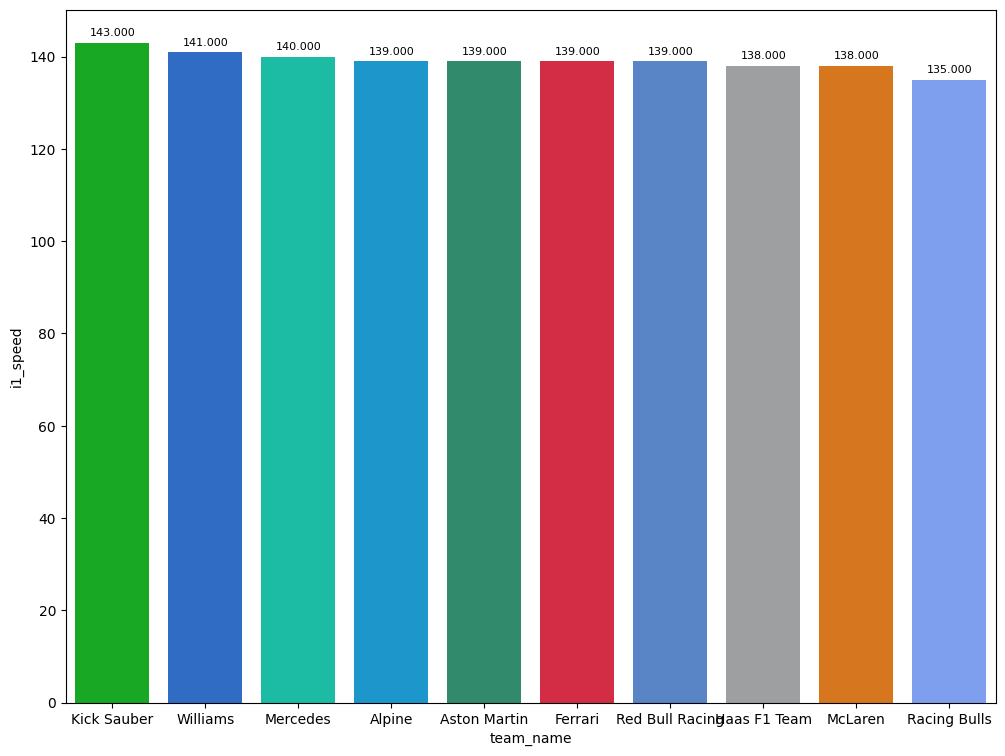

In [33]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i1_speed'].idxmax()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i1_speed",top_speed)

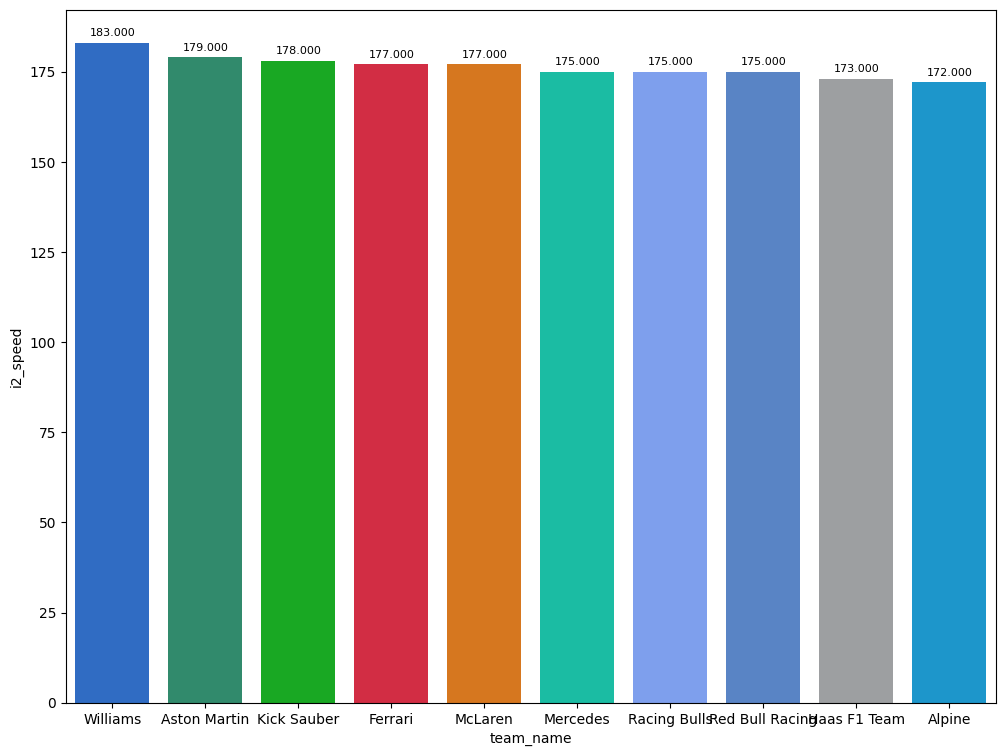

In [34]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['i2_speed'].idxmax()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","i2_speed",top_speed)

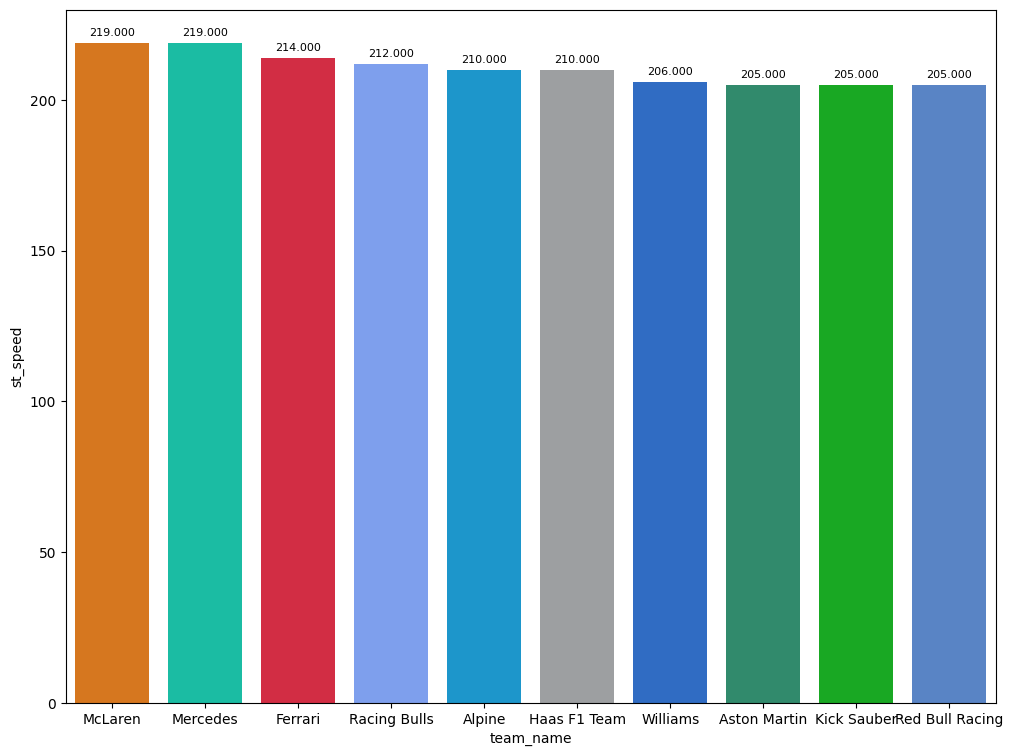

In [35]:
top_speed = jointables.loc[jointables.groupby(['team_name'])['st_speed'].idxmax()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("team_name","st_speed",top_speed)

In [36]:
mergequaly = pd.merge(competitiveLaps,drivers,on=['driver_number'])

In order to know when each session finished, race control dataset will be consulted.

In [55]:
maximumDateQ1 = "date_start <'2025-11-22T04:31:00+00:00'"
maximumDateQ2 = "date_start <'2025-11-22T04:54:00+00:00' and date_start >'2025-11-22T04:31:00+00:00'"
maximumDateQ3 = "date_start >'2025-11-22T04:54:00+00:00'"

### Qualyfing 1

In [39]:
q1Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ1).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver,I will do a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

Every driver was improved each lap and mistakes were frequently. Driver that finished their fastest attemp in the last chance were able to pass



In [40]:
#Reference
P15 = q1Data[14:15]

In [122]:
P15

,meeting_key_x,session_key_x,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,...,broadcast_name,full_name,name_acronym,team_name,team_colour,first_name,last_name,headshot_url,country_code,isFastestLap
3,1274,9854,87,7,2025-11-22T04:13:21.941000+00:00,33.123,39.924,42.969,141.0,175,...,O BEARMAN,Oliver BEARMAN,BEA,Haas F1 Team,9C9FA2,Oliver,Bearman,https://media.formula1.com/d_driver_fallback_i...,None,True


In [41]:
print(
"Driver:",P15.full_name.to_string(index=False),
"Sector 1: ",P15.duration_sector_1.to_string(index=False),
"Sector 2: ",P15.duration_sector_2.to_string(index=False),
"Sector 3: ",P15.duration_sector_3.to_string(index=False)
)

Driver: Oliver BEARMAN Sector 1:  33.123 Sector 2:  39.924 Sector 3:  42.969


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [112]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[15::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,23,0.204,0.400,0.270,-0.466,ALB
1,12,0.298,0.057,-0.018,0.259,ANT
2,5,0.658,0.596,0.053,0.009,BOR
3,22,0.782,0.459,0.986,-0.663,TSU
4,44,1.099,0.456,1.249,-0.606,HAM


In [128]:
driver_1 = P15.name_acronym.values[0]
driver_2 = np.array(newdataset2.name_acronym)[0]
val = P15.lap_duration.values[0]

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_ti

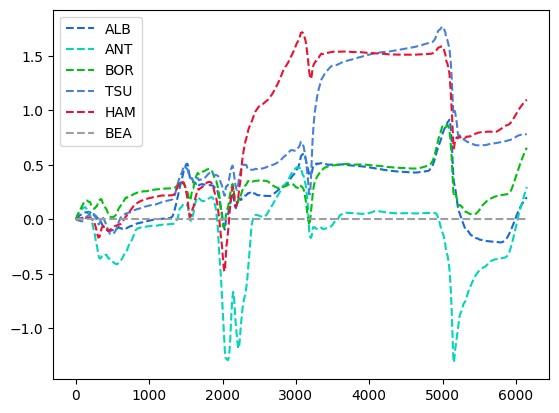

In [50]:
libraryDataF1.draw_gap(P15,15,20,q1Data,drivers,session)

##### Analysis with the drivers that finished better than the driver at risk
I bring this section in order to know where the driver at risk lost his chances to improve in the qualyfing.

In [45]:
newdataset2 = pd.DataFrame()
for index,row in q1Data[0:14].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P15,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,63,-2.872,-0.649,-0.441,-1.782,RUS
1,1,-2.558,-0.422,-1.327,-0.809,VER
2,14,-2.277,-0.336,-0.617,-1.324,ALO
3,18,-1.600,-0.116,-0.468,-1.016,STR
4,10,-1.584,-0.305,-0.337,-0.942,GAS
5,81,-1.472,0.085,-0.350,-1.207,PIA
6,27,-1.461,-0.422,-0.390,-0.649,HUL
7,31,-1.381,0.021,-0.346,-1.056,OCO
8,16,-1.202,-0.215,-0.610,-0.377,LEC
9,30,-1.188,0.236,-0.369,-1.055,LAW


In [134]:
# Comparaison driver at risk vs 1st eliminated
def comparaison_microsectors(driver_1, driver_2,val):
    num_microsectors = 35
    lap_driver_1 = session.laps.pick_driver(driver_1).query("LapTimeSeconds == @val")
    lap_driver_2 = session.laps.pick_driver(driver_2).pick_fastest()
    # Obtain telemetry
    telemetry_driver_1 = lap_driver_1.get_telemetry().add_distance()
    telemetry_driver_2 = lap_driver_2.get_telemetry().add_distance()

    # Add driver column
    telemetry_driver_1['Driver'] = driver_1
    telemetry_driver_2['Driver'] = driver_2

    # Mix telemetry of both drivers
    telemetry = pd.concat([telemetry_driver_1, telemetry_driver_2])

    # Create microsectors based on distance
    total_distance = telemetry['Distance'].max()
    microsector_size = total_distance / num_microsectors
    telemetry['MicroSector'] = (telemetry['Distance'] / microsector_size).astype(int)

    # Calculate laptimes using microsector
    telemetry['Time_Diff'] = telemetry['Distance'].diff() / telemetry['Speed'] * 3.6  # Tiempo en segundos
    microsector_times = telemetry.groupby(['Driver', 'MicroSector'])['Time_Diff'].sum().unstack(level=0)

    # Compare microsectors
    comparison = pd.DataFrame({
        f'Time_{driver_1} (s)': microsector_times[driver_1],
        f'Time_{driver_2} (s)': microsector_times[driver_2],
        'Difference (s)': microsector_times[driver_1] - microsector_times[driver_2],  # Positivo: driver_2 más rápido
        'Faster_Driver': np.where(microsector_times[driver_1] < microsector_times[driver_2], driver_1, driver_2)
    })

    # Obtain circuit information
    circuit_info = session.get_circuit_info()

    # Show the circuit
    fig, ax = plt.subplots(figsize=(18, 15))
    # Draw the circuit with the differences
    for microsector in comparison.index:
        microsector_data = telemetry[telemetry['MicroSector'] == microsector]
        if not microsector_data.empty:
            # Obtain coordinates per sector
            x = microsector_data['X']
            y = microsector_data['Y']
            # Obtain fastest driver
            faster_driver = comparison.loc[microsector, 'Faster_Driver']
            color = "red" if faster_driver == driver_1 else "blue"
            # Draw the segment
            ax.plot(x, y, color=color, linewidth=1, label=faster_driver if microsector == 0 or (microsector == 1 and faster_driver != comparison.loc[0, 'Faster_Driver']) else None)

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))  # Remove duplicates
    print(by_label)
    ax.legend(by_label.values(), by_label.keys(), title='Fastest driver')
    # Set up
    ax.set_title(f"Microsectors comparaison {driver_1} vs {driver_2} - {session.event['EventName']} {session.name} 2025")
    ax.set_xlabel("X (metres)")
    ax.set_ylabel("Y (metres)")
    ax.set_aspect('equal')
    plt.show()



core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


{'ALB': <matplotlib.lines.Line2D object at 0x7f786d9909d0>}


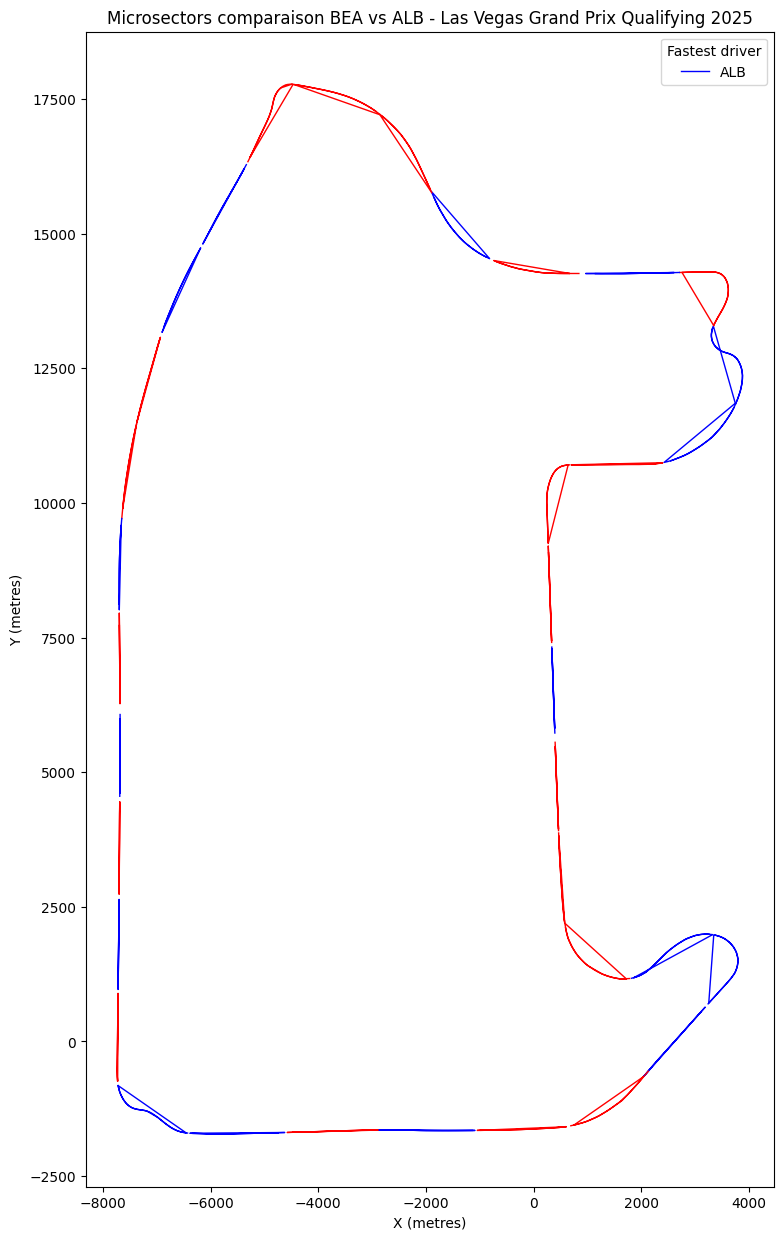

In [135]:
comparaison_microsectors(driver_1,driver_2,val)

#### Best sector per driver
In this section we can see the best sector of the session

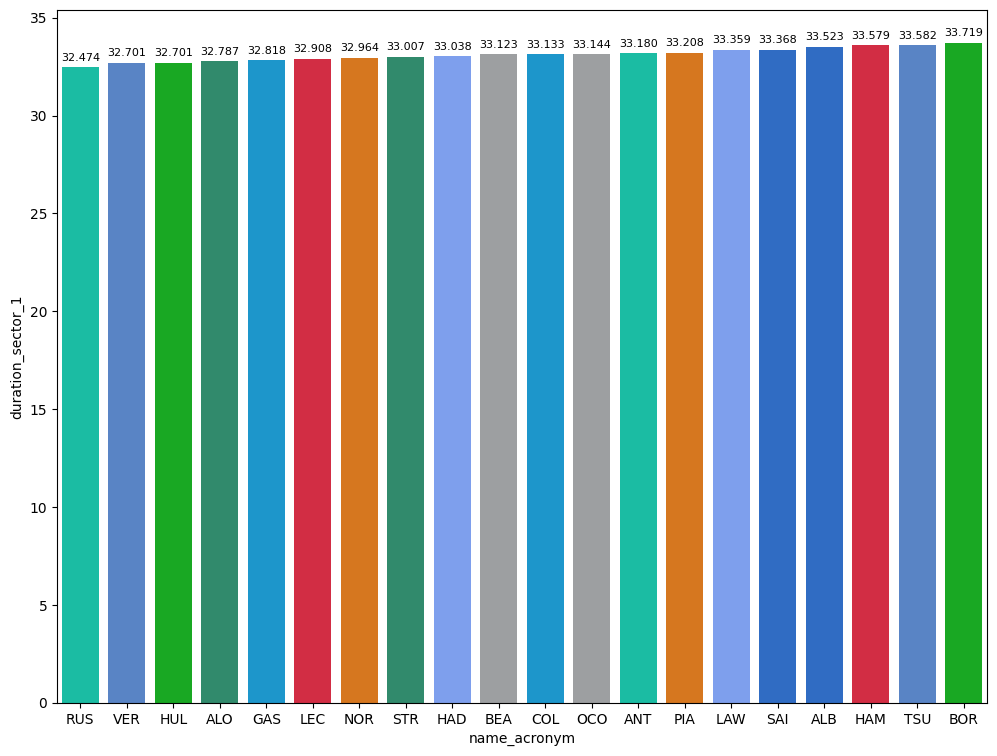

In [46]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q1Data.sort_values(by=['duration_sector_1'],ascending=True))

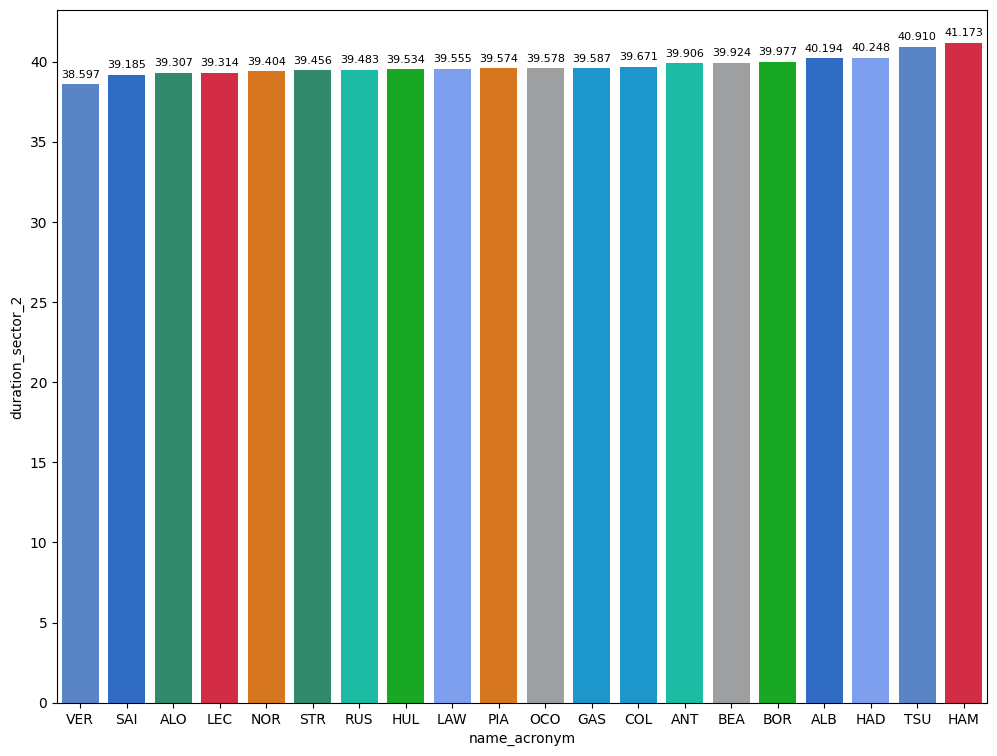

In [47]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q1Data.sort_values(by=['duration_sector_2'],ascending=True))

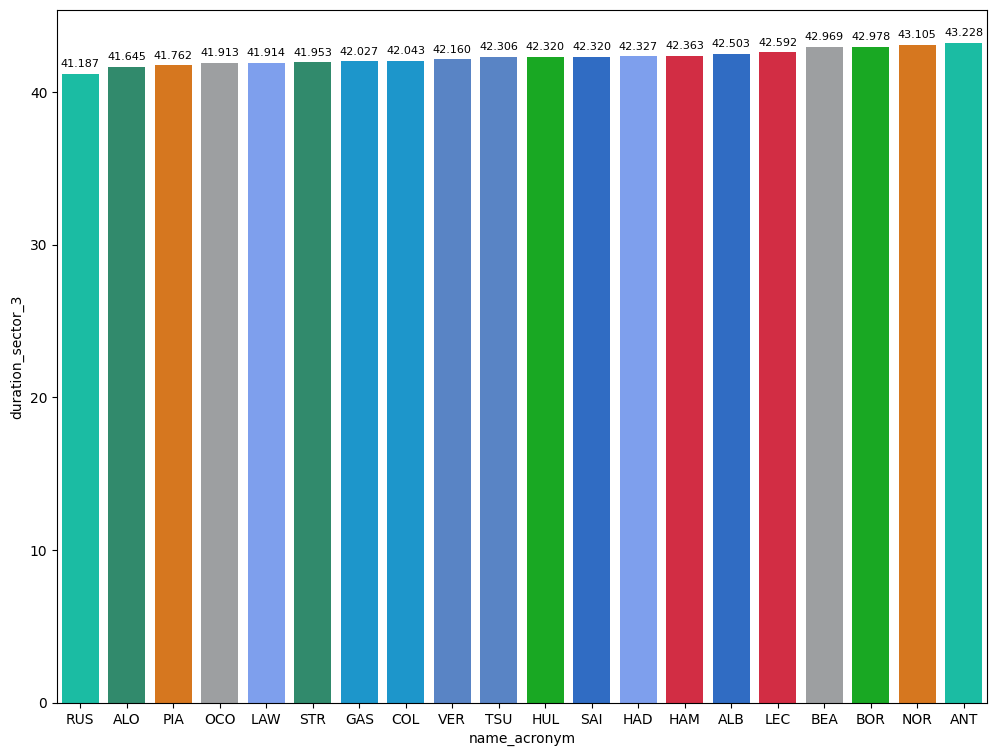

In [48]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q1Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 2

In [56]:
q2Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ2).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with driver at risk
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [57]:
#Reference
P10 = q2Data[9:10]
print(
"Driver:",P10.full_name.to_string(index=False),
"Sector 1: ",P10.duration_sector_1.to_string(index=False),
"Sector 2: ",P10.duration_sector_2.to_string(index=False),
"Sector 3: ",P10.duration_sector_3.to_string(index=False)
)

Driver: Oscar PIASTRI Sector 1:  32.132 Sector 2:  39.056 Sector 3:  40.938


##### Analysis of each sector of the driver at risk compared to the drivers eliminated.


In [136]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[10::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,27,0.655,0.286,0.007,0.362,HUL
1,18,0.724,0.168,-0.112,0.668,STR
2,31,0.861,0.469,0.254,0.138,OCO
3,87,0.968,0.241,0.188,0.539,BEA
4,43,1.557,0.507,0.050,1.000,COL


In [137]:
driver_1 = P10.name_acronym.values[0]
driver_2 = np.array(newdataset2.name_acronym)[0]
val = P10.lap_duration.values[0]

/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.
  warnings.warn("`utils.delta_time` is considered deprecated and will"
/home/frank/.local/lib/python3.8/site-packages/fastf1/utils.py:91: FutureWarning: `utils.delta_ti

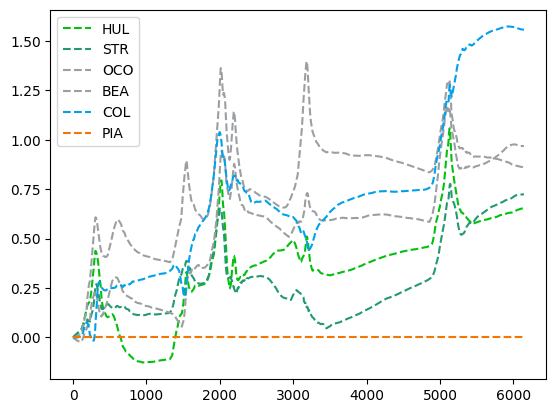

In [60]:

libraryDataF1.draw_gap(P10,10,15,q2Data,drivers,session)
    

##### Analysis with the drivers that finished better than the driver at risk

In [61]:
newdataset2 = pd.DataFrame()
for index,row in q2Data[0:9].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P10,newdataset2)

newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,63,-1.191,-0.320,-0.373,-0.498,RUS
1,6,-1.006,-0.296,-0.531,-0.179,HAD
2,55,-0.982,-0.150,-0.441,-0.391,SAI
3,4,-0.747,-0.285,-0.666,0.204,NOR
4,1,-0.533,-0.143,-0.676,0.286,VER
5,30,-0.505,-0.104,-0.186,-0.215,LAW
6,10,-0.366,-0.305,-0.271,0.210,GAS
7,14,-0.261,-0.152,-0.153,0.044,ALO
8,16,-0.174,-0.640,0.087,0.379,LEC


{'HUL': <matplotlib.lines.Line2D object at 0x7f786e4e10a0>, 'PIA': <matplotlib.lines.Line2D object at 0x7f786e4ba940>}


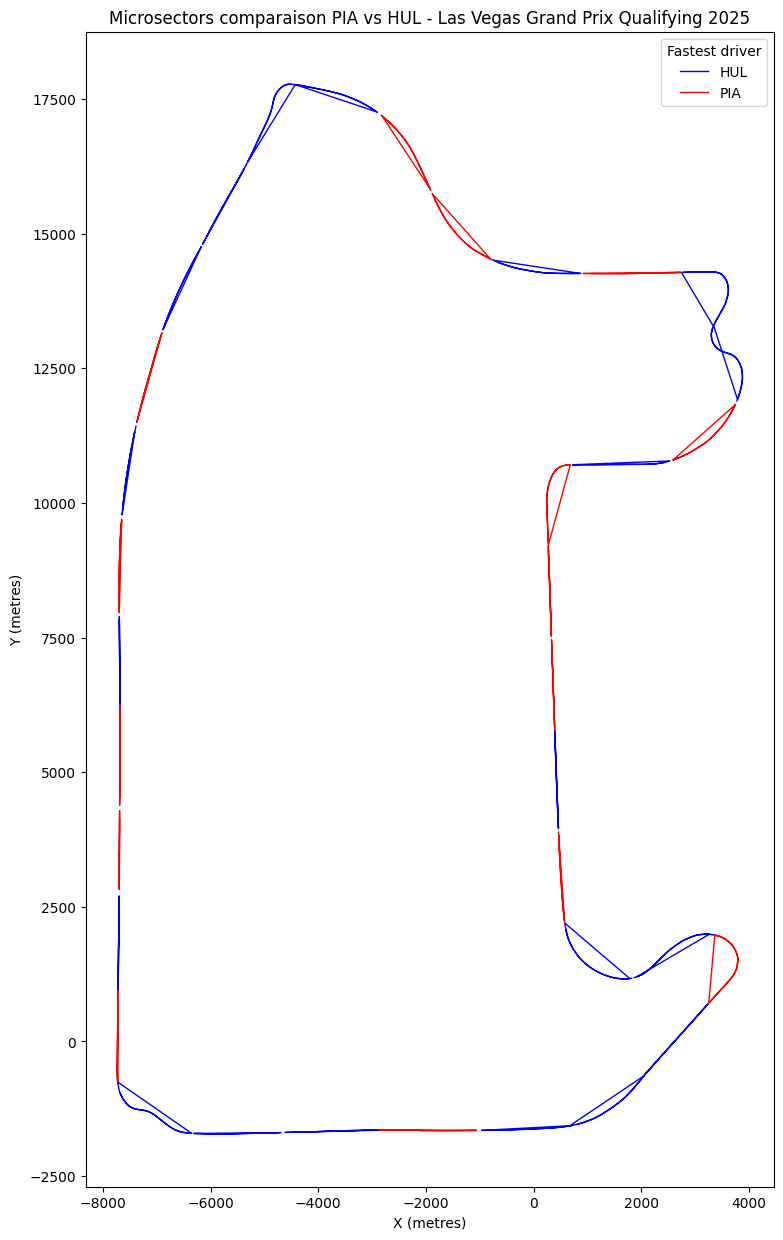

In [138]:
comparaison_microsectors(driver_1,driver_2,val)

#### Best sector per driver
In this section we can see the best sector of the session

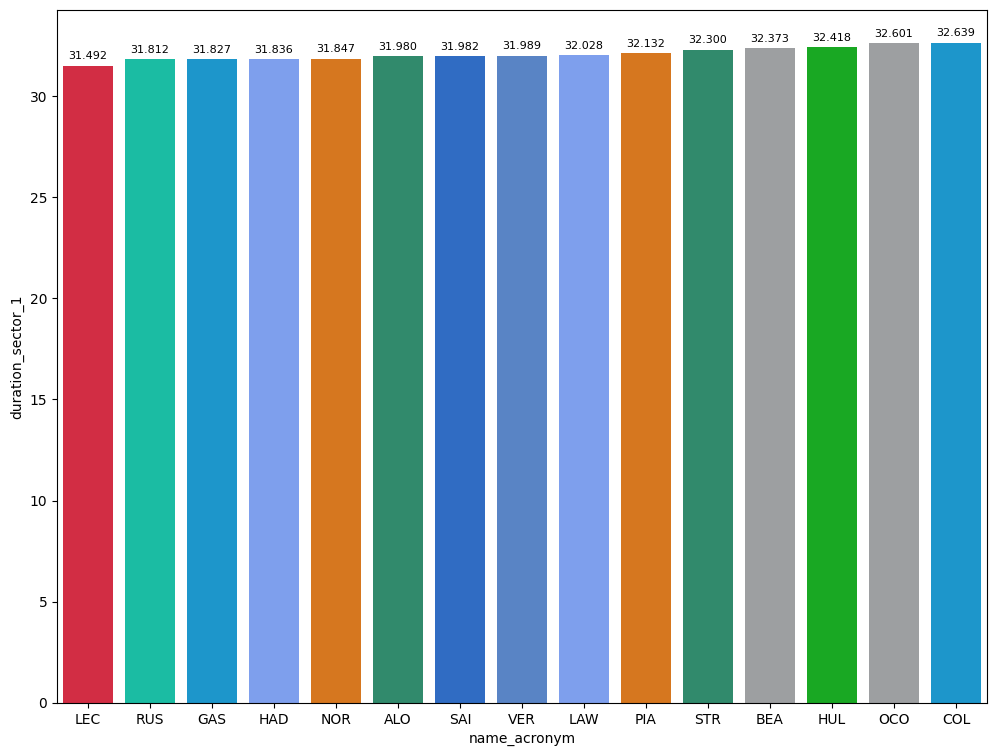

In [62]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q2Data.sort_values(by=['duration_sector_1'],ascending=True))

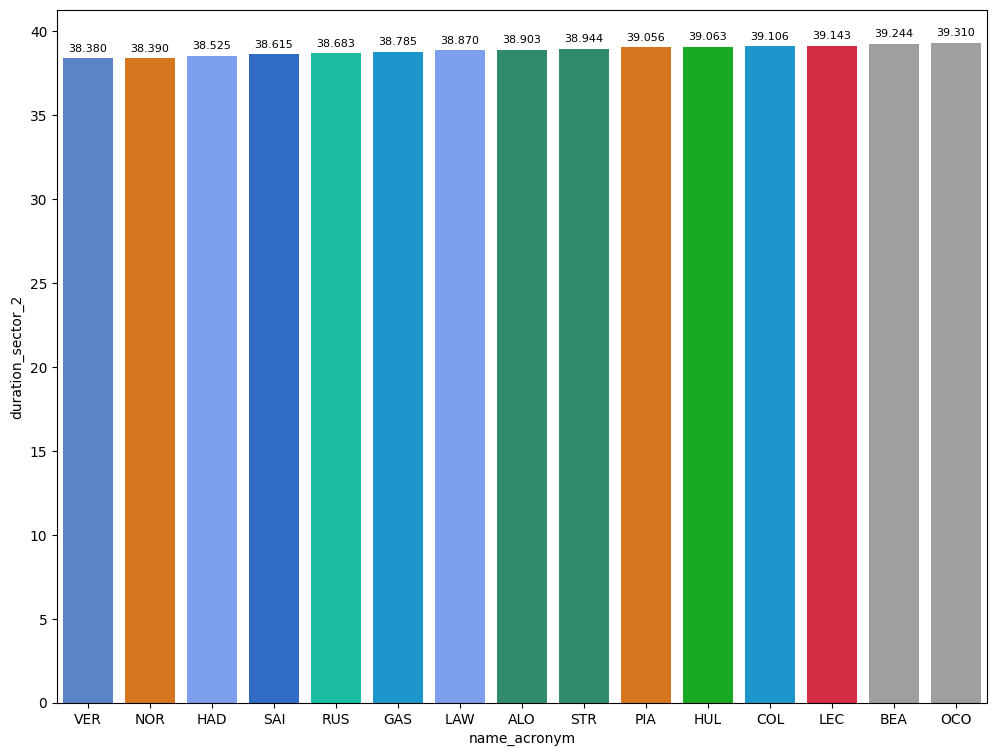

In [63]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q2Data.sort_values(by=['duration_sector_2'],ascending=True))

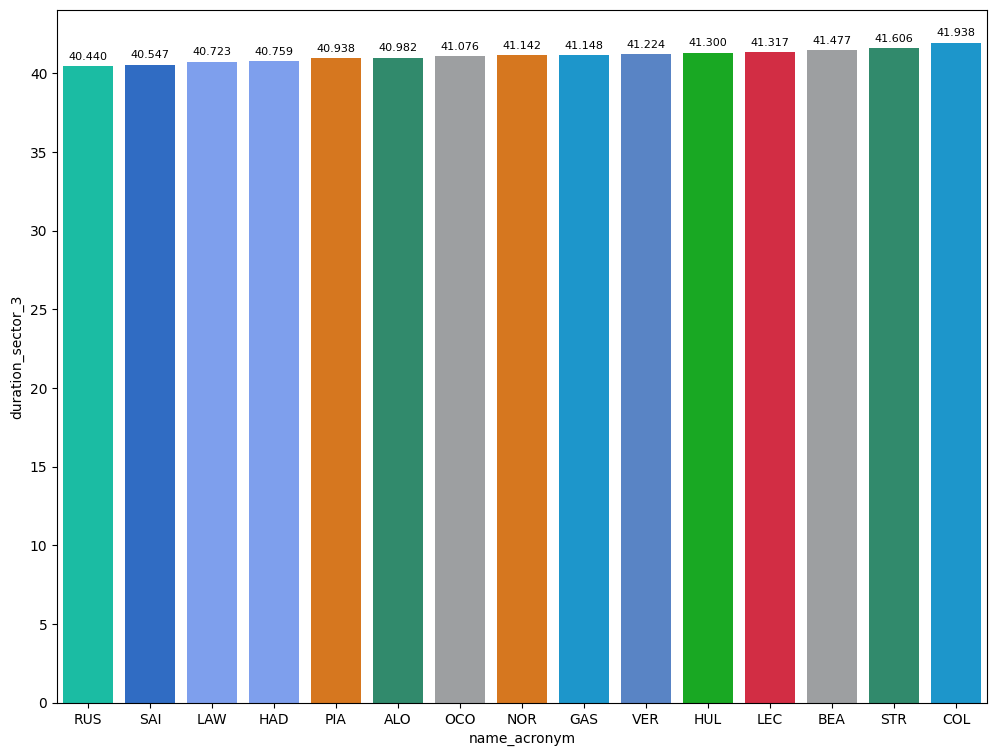

In [64]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q2Data.sort_values(by=['duration_sector_3'],ascending=True))

### Qualyfing 3

In [65]:
q3Data = libraryDataF1.obtainInfoAboutQualySession(mergequaly,maximumDateQ3).query("isFastestLap == True").sort_values(by=['lap_duration'],ascending=True)

##### Comparaison with poleman
In this section with the fastest lap done for each driver (laptimes deleted will not be taken into account to do this analysis) it will be a comparaison in order to see where the driver eliminated lost/gain time in their fastest lap.

In [66]:
#Reference
P1 = q3Data[:1]
print(
"Driver:",P1.full_name.to_string(index=False),
"Sector 1: ",P1.duration_sector_1.to_string(index=False),
"Sector 2: ",P1.duration_sector_2.to_string(index=False),
"Sector 3: ",P1.duration_sector_3.to_string(index=False)
)

Driver: Lando NORRIS Sector 1:  30.43 Sector 2:  36.842 Sector 3:  40.662


##### Analysis of each sector of the poleman compared to the drivers eliminated.



In [67]:
newdataset2 = pd.DataFrame()
for index,row in q3Data[1::].iterrows():
    newdataset2 = libraryDataF1.obtain_difference_regard_reference(row,P1,newdataset2)
newdataset2

,driver_number,lap_duration,difference_sector_1,difference_sector_2,difference_sector_3,name_acronym
0,1,0.323,0.433,0.549,-0.659,VER
1,55,0.362,0.464,0.766,-0.868,SAI
2,63,0.869,0.357,1.374,-0.862,RUS
3,81,1.027,0.545,1.047,-0.565,PIA
4,30,1.128,0.955,0.751,-0.578,LAW
5,14,1.532,0.949,0.721,-0.138,ALO
6,6,1.620,0.721,1.483,-0.584,HAD
7,16,1.938,0.359,1.460,0.119,LEC
8,10,3.606,1.696,1.879,0.031,GAS


#### Best sector per driver
In this section we can see the best sector of the session

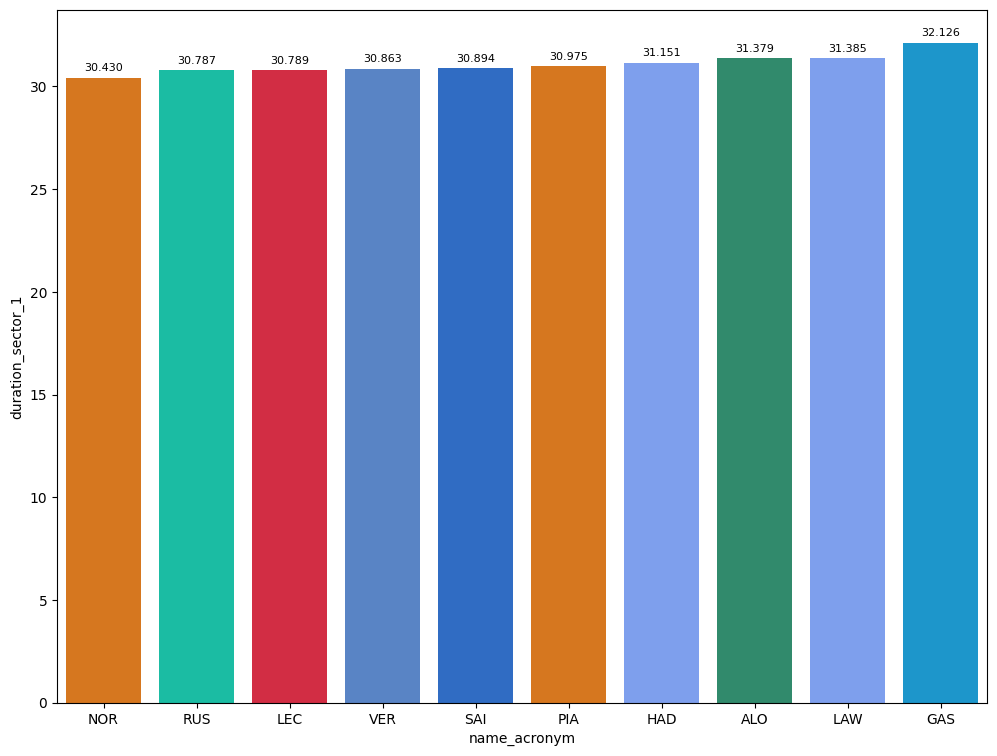

In [68]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",q3Data.sort_values(by=['duration_sector_1'],ascending=True))

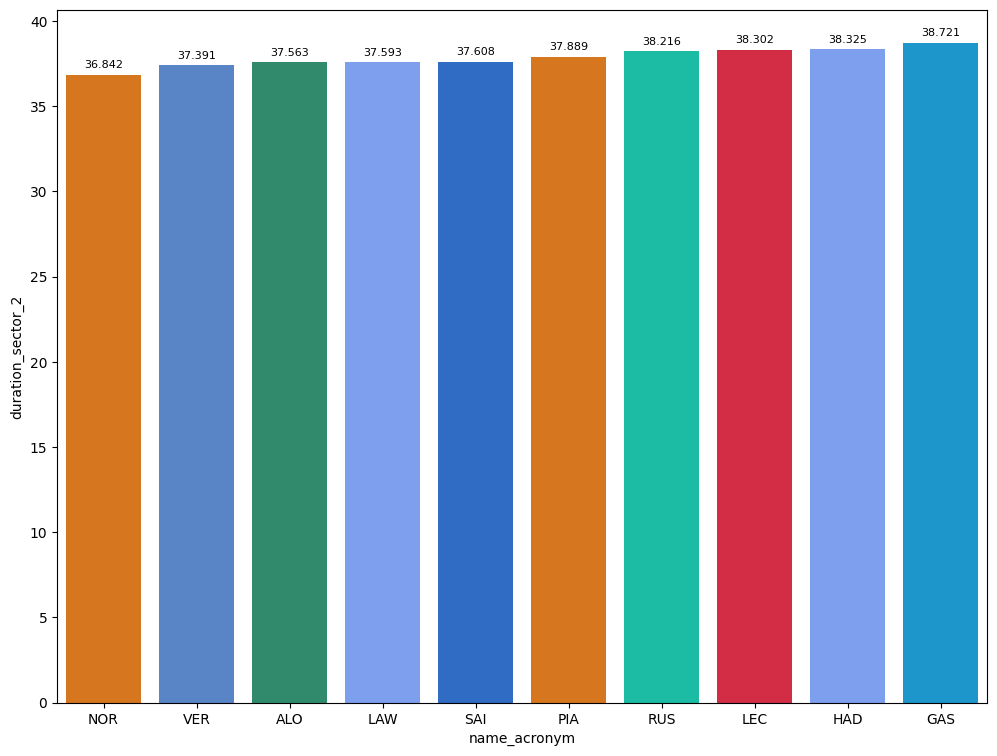

In [69]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",q3Data.sort_values(by=['duration_sector_2'],ascending=True))

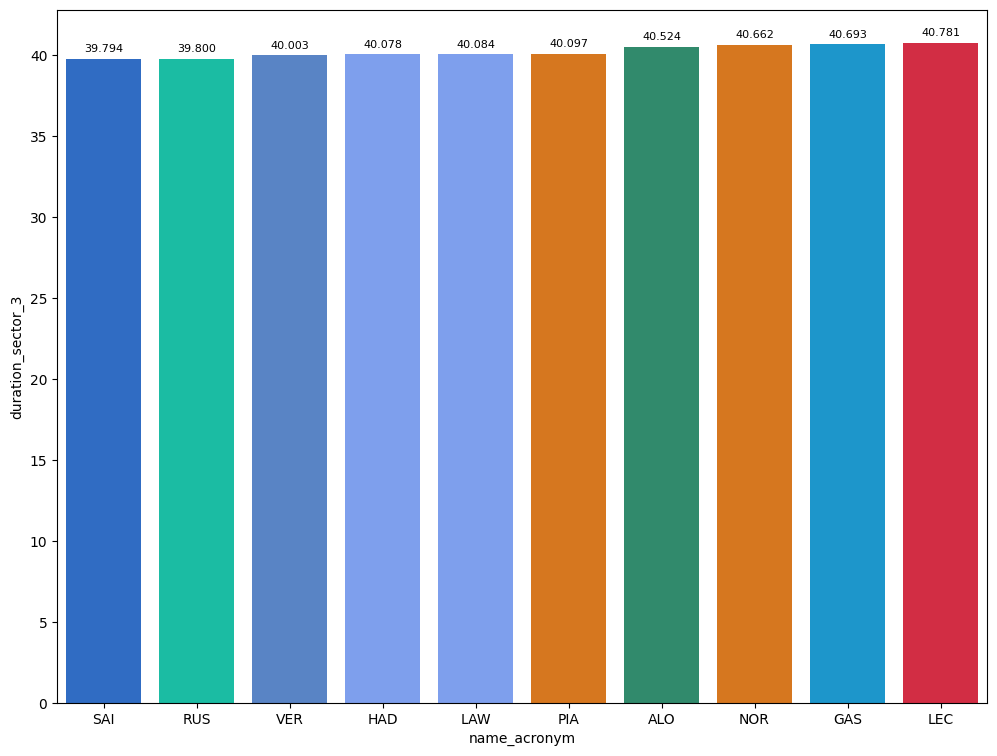

In [70]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",q3Data.sort_values(by=['duration_sector_3'],ascending=True))

#### Best sector per driver of the session (in general)

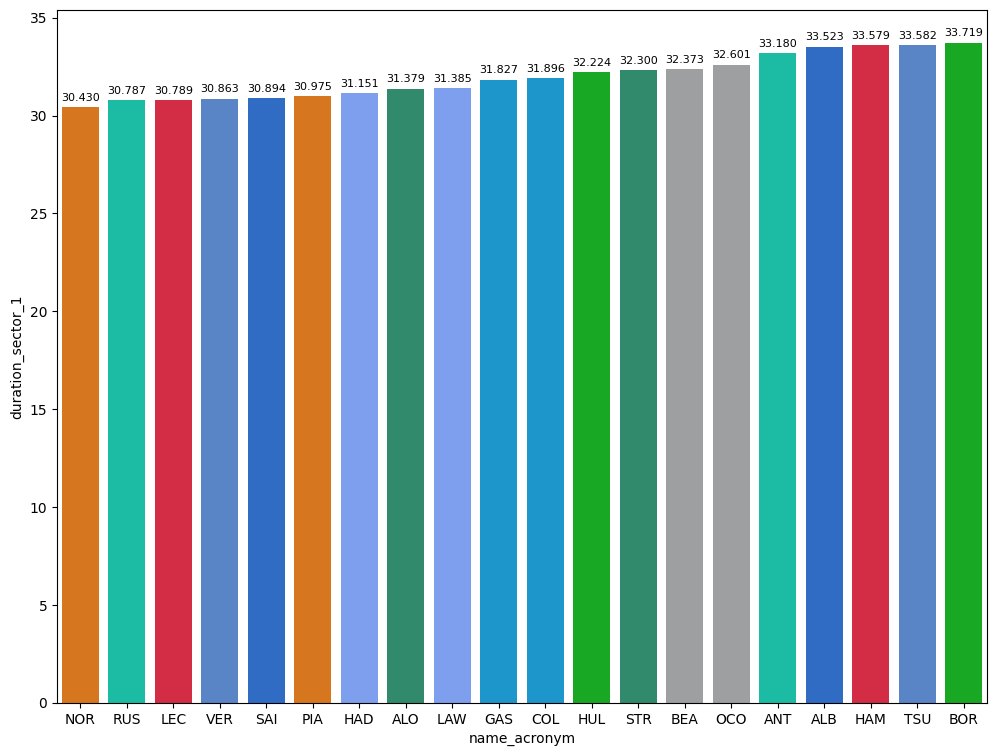

In [74]:
libraryDataF1.obtainchart("name_acronym","duration_sector_1",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_1'].min().sort_values(ascending=True)).reset_index())

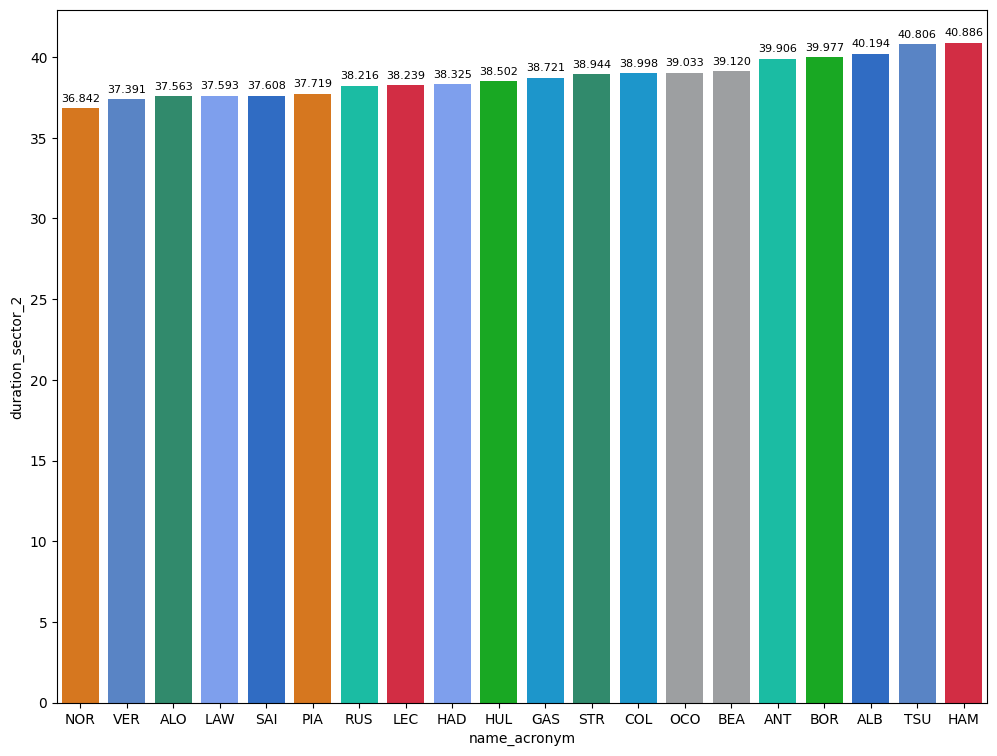

In [75]:
libraryDataF1.obtainchart("name_acronym","duration_sector_2",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_2'].min().sort_values(ascending=True)).reset_index())

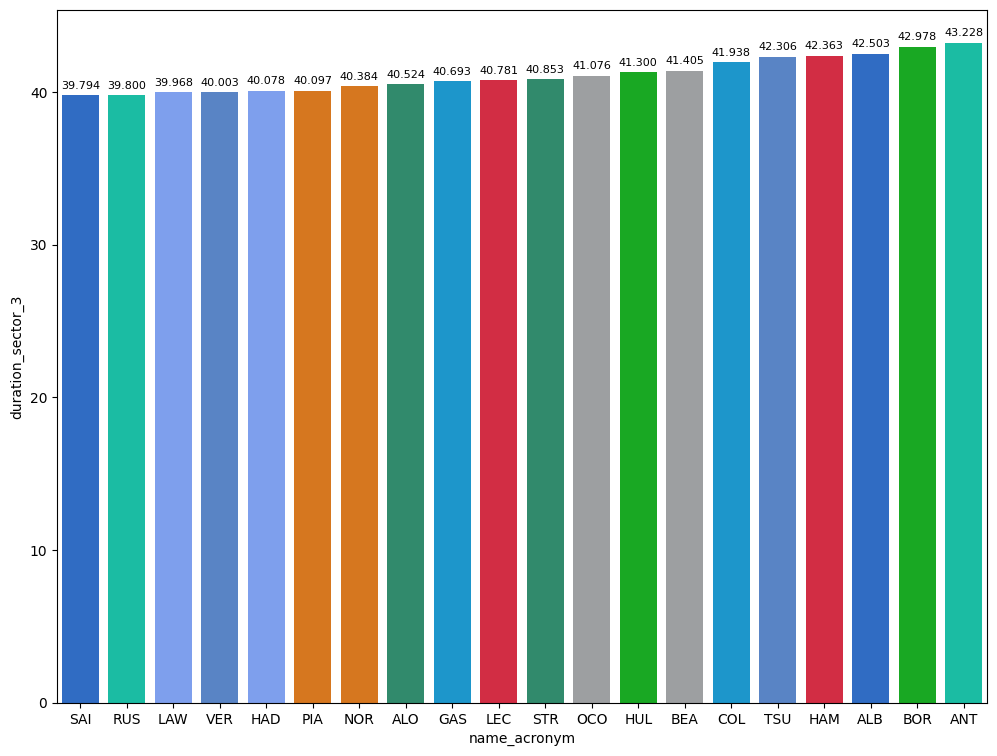

In [76]:
libraryDataF1.obtainchart("name_acronym","duration_sector_3",pd.DataFrame(mergequaly.groupby("name_acronym")['duration_sector_3'].min().sort_values(ascending=True)).reset_index())

### Comparaison between the poleman and the second

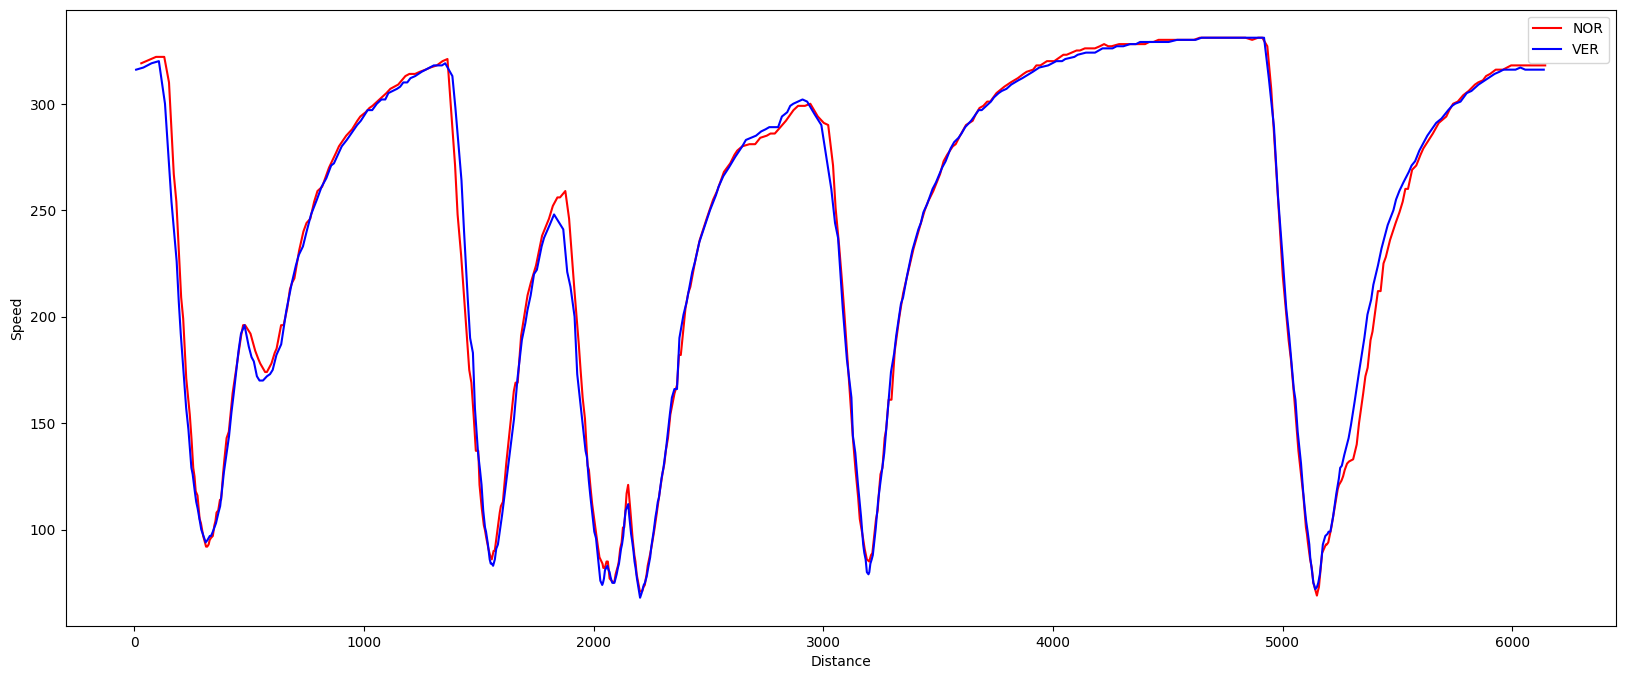

In [77]:
libraryDataF1.plot_telemetry("Distance","Speed",dt,session)

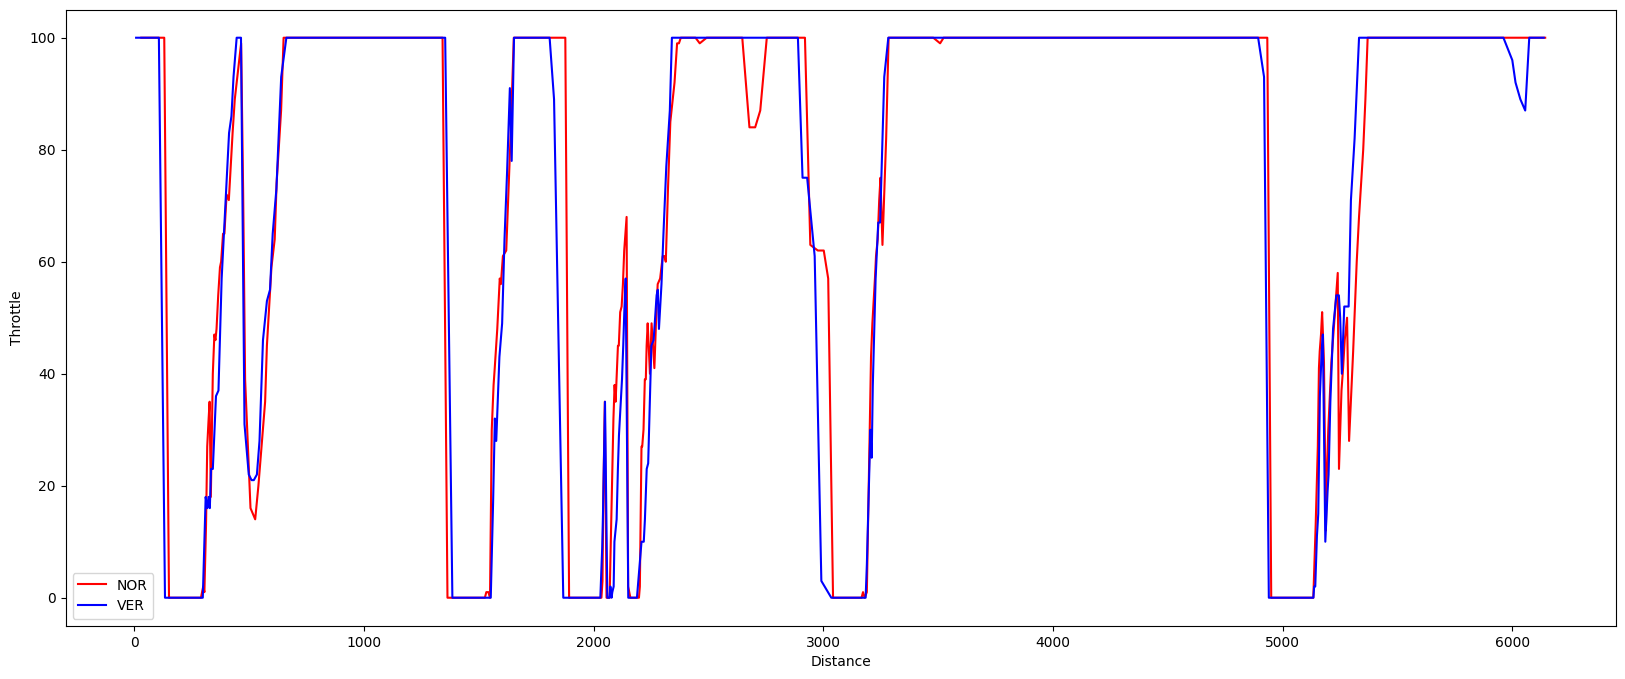

In [78]:
libraryDataF1.plot_telemetry("Distance","Throttle",dt,session)

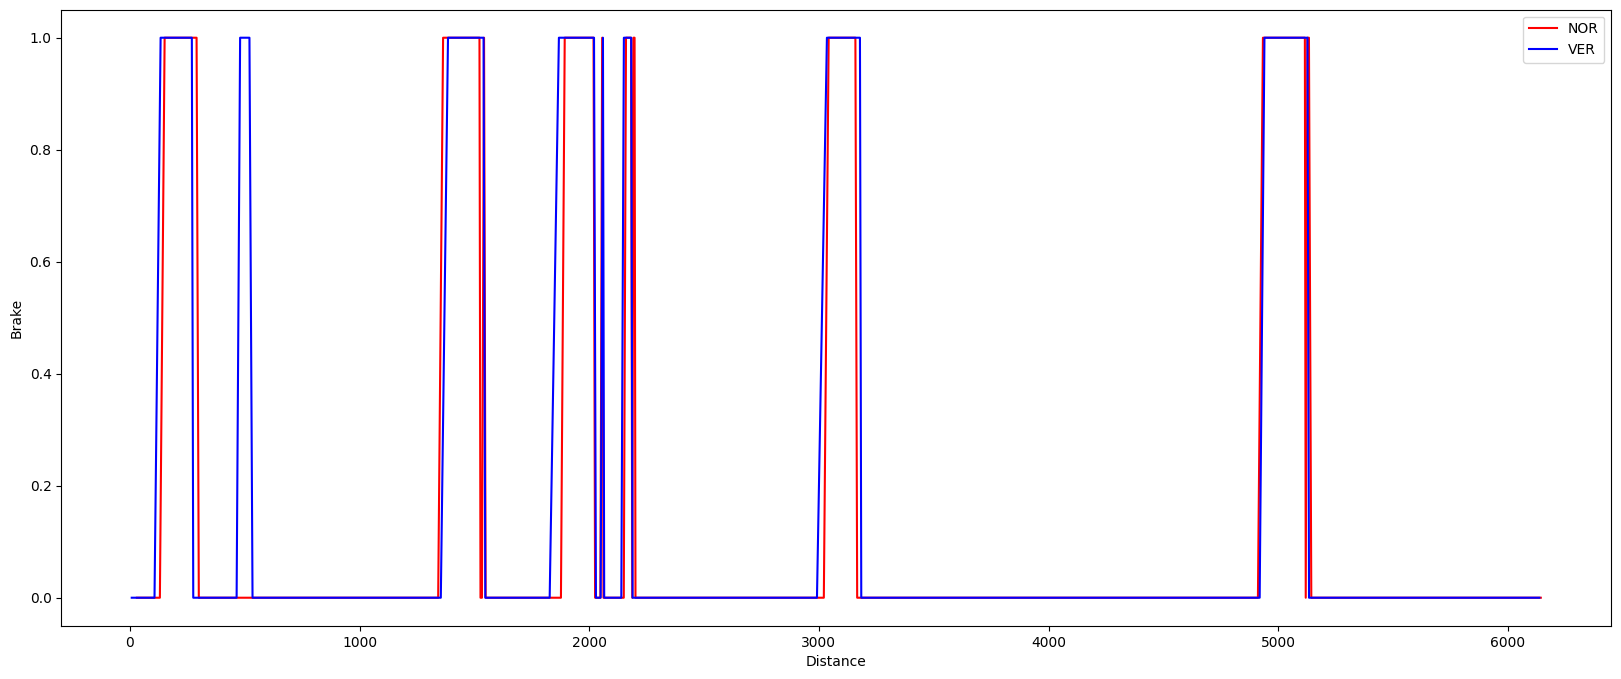

In [79]:
libraryDataF1.plot_telemetry("Distance","Brake",dt,session)

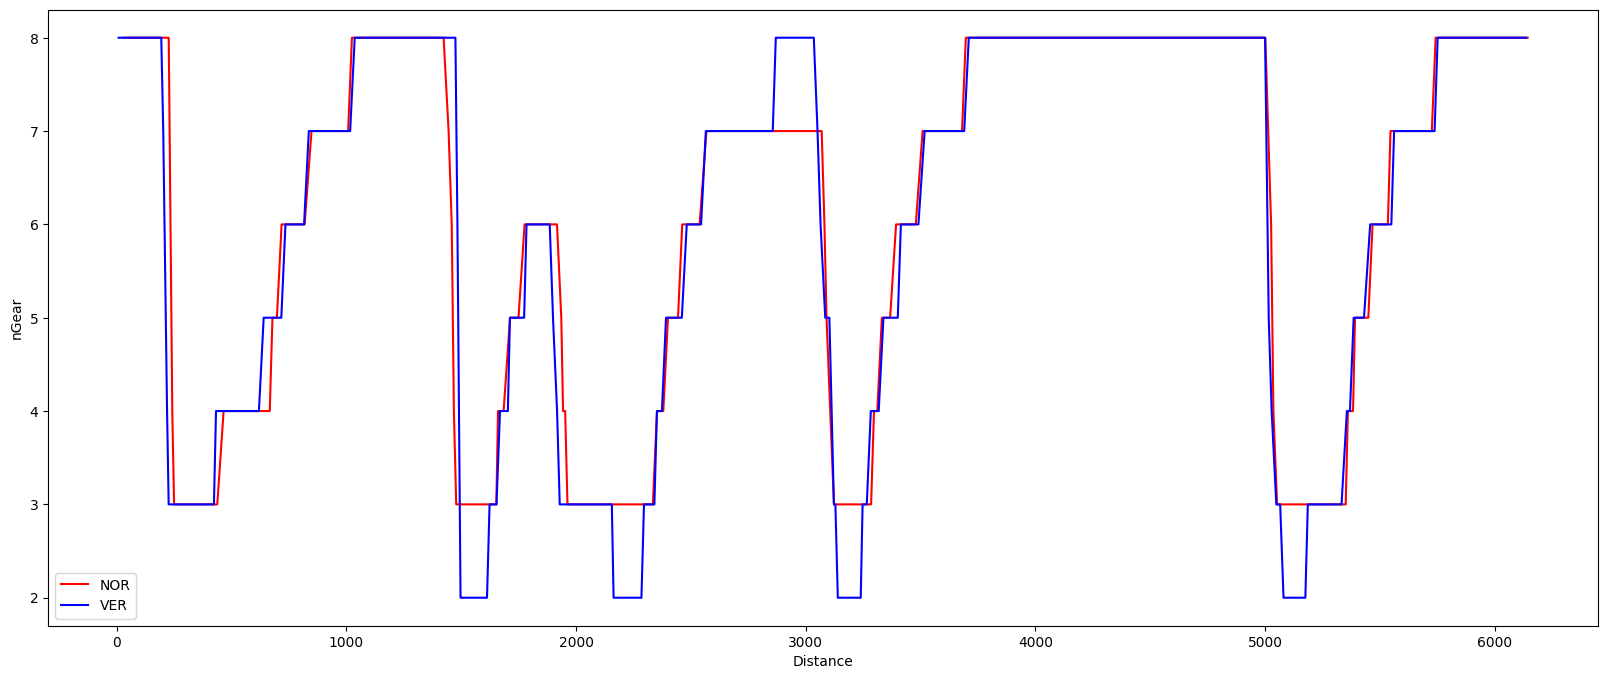

In [80]:
libraryDataF1.plot_telemetry("Distance","nGear",dt,session)

## Race
### Obtain setup

In [ ]:
race = libraryDataF1.obtain_information('laps',session_key=9644)
stintInformation = libraryDataF1.obtain_information('stints',session_key=9644)
drivers = libraryDataF1.obtain_information('drivers',session_key=9644)
drivers.loc[drivers['driver_number']==30,'team_colour'] = '6692FF'
drivers.loc[drivers['driver_number']==43,'team_colour'] = '64C4FF'
libraryDataF1.obtain_drivers_colours(drivers)

In [ ]:
stintsDataFrame =libraryDataF1.stint_configuration(drivers,stintInformation)

In [ ]:
raceLaps = race.query("is_pit_out_lap == False")
jointables = pd.merge(raceLaps,stintsDataFrame,on=['lap_number','driver_number'])

### Speed trap

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['st_speed'].idxmax().dropna()].sort_values(by=['st_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","st_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i1_speed'].idxmax().dropna()].sort_values(by=['i1_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i1_speed",top_speed)

In [ ]:
top_speed = jointables.loc[jointables.groupby(['name_acronym'])['i2_speed'].idxmax().dropna()].sort_values(by=['i2_speed'],ascending=False)
libraryDataF1.obtainchart("name_acronym","i2_speed",top_speed)

### Long runs

In [ ]:
MINIMUN_SECONDS = 95
MAXIMUM_SECONDS = 103

#### Red Bull Racing

In [ ]:
stintInformation.query('driver_number == 1 or driver_number == 11')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,1,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,11,'Red Bull Racing',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Ferrari

In [ ]:
stintInformation.query('driver_number == 55 or driver_number == 16')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,16,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,55,'Ferrari',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Mercedes

In [ ]:
stintInformation.query('driver_number == 63 or driver_number == 44')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,44,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,63,'Mercedes',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### McLaren

In [ ]:
stintInformation.query('driver_number == 81 or driver_number == 4')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,4,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,81,'McLaren',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Aston Martin

In [ ]:
stintInformation.query('driver_number == 18 or driver_number == 14')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,14,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,18,'Aston Martin',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### RB

In [ ]:
stintInformation.query('driver_number == 30 or driver_number == 22')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,30,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,22,'RB',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Haas

In [ ]:
stintInformation.query('driver_number == 20 or driver_number == 27')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,20,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,27,'Haas F1 Team',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data


In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Alpine

In [ ]:
stintInformation.query('driver_number == 10 or driver_number == 31')

In [ ]:
data =libraryDataF1.getinfolongruns(jointables,31,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,10,'Alpine',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Williams

In [ ]:
stintInformation.query('driver_number == 43 or driver_number == 23')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,23,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data= libraryDataF1.getinfolongruns(jointables,43,'Williams',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

#### Kick Sauber

In [ ]:
stintInformation.query('driver_number == 24 or driver_number == 77')

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,24,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

In [ ]:
data = libraryDataF1.getinfolongruns(jointables,77,'Kick Sauber',MINIMUN_SECONDS,MAXIMUM_SECONDS)
data

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_graph(data)

In [ ]:
if len(data) != 0:
    libraryDataF1.race_pace_divided_per_sectors(data)

### Pits
Before to finish the analysis, I added the Pits sections where it can see how much time teams spent in the box.

In [ ]:
pit = libraryDataF1.obtain_information('pit',session_key=9644)

In [ ]:
jointables = pd.merge(drivers,pit,on=['driver_number']).query("pit_duration<120")
jointables
pit_duration = pd.DataFrame(jointables.groupby('team_name')['pit_duration'].mean().sort_values(ascending=True))
pit_duration